In [70]:
# For using custom module.
import sys
sys.path.append('../custom_library')

In [71]:
import spacy
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd 
import connect_to_db as cn
from gensim import corpora
import gensim
import csv
import parmap
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import seaborn as sns
import pymysql.cursors
import pandas as pd
import numpy as np
import connect_to_db as cn
import json
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import csv
import parmap
import random

In [80]:
from os import listdir

def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames_words = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_10_for_tsne")
filenames_weights = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_weights_10_for_tsne")

communities = []

for name in filenames:
    communities.append(name.split('_')[1])

In [76]:
print(len(communities))

8228


In [7]:
# print(filenames)
print(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[0]}')

../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/community_6849_topics_10_words.csv


# union topic words

In [16]:
all_tw = []
for filename in filenames:
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filename}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = list(set(sum(topics, []))) 
        all_tw.append(topics)

print(all_tw)

[['man', 'kid', 'best', 'in', 'irish', 'hate', 'friend', 'looking'], ['acne', 'work', 'throwing', 'worst', 'anxiety', 'away', 'stressed', 'pick', 'crazy', 'especially'], ['need', 'pill', 'career', 'close', 'suicide', 'sabotaging', 'anxiety', 'life', 'depression', 'change'], ['counseling', 'session', 'cry', 'message', 'every', 'anxious', 'opening'], ['daughter', 'slept', 'ppl', 'better', 'say', 'ago', 'bf', 'engages', 'hate', 'theyre'], ['infront', 'killed', 'almost', 'friend'], ['anymore', 'know', 'donâ€™t'], ['option', 'depressed', 'game', 'honestly', 'one', 'bday', 'life', 'online', 'extremely', 'head', 'friend', 'right', 'drunk', 'way', 'family', 'fantasize', 'allowed', 'tried', 'body', 'insecure', 'say', 'aware', 'depression', 'loved', 'consistent', 'cry', 'actually', 'wrote', 'poem', 'feeling'], ['even', 'loneliness', 'remembered', 'killing', 'one', 'turned', 'recently', 'slowly', 'think', 'mom'], ['sister', 'depressed', 'accident', 'gray', 'user', 'hurt', 'alone', 'die', 'antidep

In [98]:
all_tws = []
all_weights = []

sorted_filenames_tws = sorted(filenames_words)
sorted_filenames_weights = sorted(filenames_weights)

for filename_wo, filename_we in zip(sorted_filenames_tws, sorted_filenames_weights):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_10_for_tsne/{filename_wo}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        all_tws.append(topics)
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_weights_10_for_tsne/{filename_we}', newline='') as f:
        reader = csv.reader(f)
        weights = list(reader)
        all_weights.append(weights)

all_tws = sum(all_tws, [])
all_weights = sum(all_weights, [])

In [100]:
mean_vector_list = []
topics_num = []

# print(all_tw)

model = Word2Vec(all_tws, min_count=1)

for filename in sorted_filenames_tws:
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_with_weight_10_for_tsne/{filename}', newline='') as f:
        reader = csv.reader(f)
        tws = list(reader)
        topics_num.append(len(tws))
        
        tws = sum(tws, [])
        # print(tws)
        
        word_vector_list = []
        mean_vector = []
        word_vectors = model.wv
        
        for tw in tws:
            word_vector_list.append(word_vectors[tw].tolist())
        
        for element in zip(*word_vector_list):
            mean_vector.append(float(np.mean(element)))
        
        mean_vector_list.append(mean_vector)

In [101]:
print(mean_vector_list[0][0])

-0.236804741024971


In [102]:
# convert list to np.array
mean_vector_array = np.array(mean_vector_list)
print(mean_vector_array)

[[-0.23680474  0.51191505  0.30484348 ... -0.64537436  0.19746713
  -0.02901444]
 [-0.20542081  0.43926367  0.25731687 ... -0.55149547  0.16812842
  -0.02397878]
 [-0.13369449  0.28647158  0.17129817 ... -0.36014743  0.11125732
  -0.01454438]
 ...
 [-0.12556415  0.26037342  0.15599805 ... -0.33307026  0.09656675
  -0.01051894]
 [-0.13897044  0.29628866  0.17820667 ... -0.37483118  0.11397712
  -0.01741667]
 [-0.21023768  0.44487123  0.26538014 ... -0.56345149  0.17085048
  -0.01876498]]


## t-SNE

In [20]:
from sklearn.manifold import TSNE

data = mean_vector_array
print(type(data))
print(data)
# n_components = 2

# model = TSNE(n_components=n_components)
# print(model.fit_transform(data))

plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[-0.17443713  0.41692028  0.11379638 ... -0.39756994  0.17581957
  -0.01571238]
 [-0.13708336  0.33799837  0.08833315 ... -0.32253033  0.14296674
  -0.00759416]
 [-0.19920323  0.49229657  0.12964838 ... -0.47161538  0.2050756
  -0.01641122]
 ...
 [-0.2030364   0.5056844   0.13559823 ... -0.4839257   0.2090249
  -0.01588834]
 [-0.14964135  0.36719048  0.09962597 ... -0.3514414   0.15067868
  -0.01045255]
 [-0.16305748  0.40639486  0.10681861 ... -0.38685169  0.16932386
  -0.0155912 ]]
[[ 14.652785   -3.6908152]
 [ 18.887154  -43.96744  ]
 [ -4.903833   74.28869  ]
 ...
 [ 11.617064   59.584927 ]
 [ 61.7638    -12.548873 ]
 [ 29.469072   20.122772 ]]


In [14]:
print(len(data))
print(len(topics_num))

print(topics_num)

8228
8228
[1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,

In [1]:
def word_count_and_tf_idf_similarity(filenames, print_word_count=False, average=True):
    all_topic_words = []
    len_files = len(filenames)
    
    
    # print(f'topic_num: {topic_num}')
    # print('')
    
    for i in range(len(filenames)):
        with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', 
                  newline='') as f:
            reader = csv.reader(f)
            topics = list(reader)
            topics = sum(topics, [])
            s_tw = set(topics)
            all_topic_words.append(topics)
           
            tw_count_list = []
        
            for tw in s_tw:
                tw_count_list.append([tw, topics.count(tw)])
            
            tw_count_dict = dict(tw_count_list)
            sorted_dict = sorted(tw_count_dict.items(), key = lambda item: item[1], reverse = True)
            
            if print_word_count:
                print(filenames[i])
                print(sorted_dict)
                print()
                
    all_topic_words = sum(all_topic_words, [])
    s_atw = set(all_topic_words)
    
    atw_count_list = []
    
    for tw in s_atw:
        if average:
            atw_count_list.append([tw, float(round(all_topic_words.count(tw) / len_files, 4))])
        else:
            atw_count_list.append([tw, all_topic_words.count(tw)])
        
    atw_count_dict = dict(atw_count_list)
    all_sorted_dict = sorted(atw_count_dict.items(), key = lambda item: item[1], reverse = True)
    
    #print('all topic words count')
    #print(all_sorted_dict)
    #print()
    
    # print(f'number of topic words: {len(all_topic_words)}, number of communities: {len(filenames)}')
    # print()
    # print(f'random tf-idf similarity: {tf_idf_similarity_from_list(random.sample(all_topic_words_from_all_files, len(all_topic_words)))}')
    # print(f'tf-idf similarity: {tf_idf_similarity_from_list(all_topic_words)}')
    
    return all_sorted_dict

In [58]:
len(data_tsne)

8228

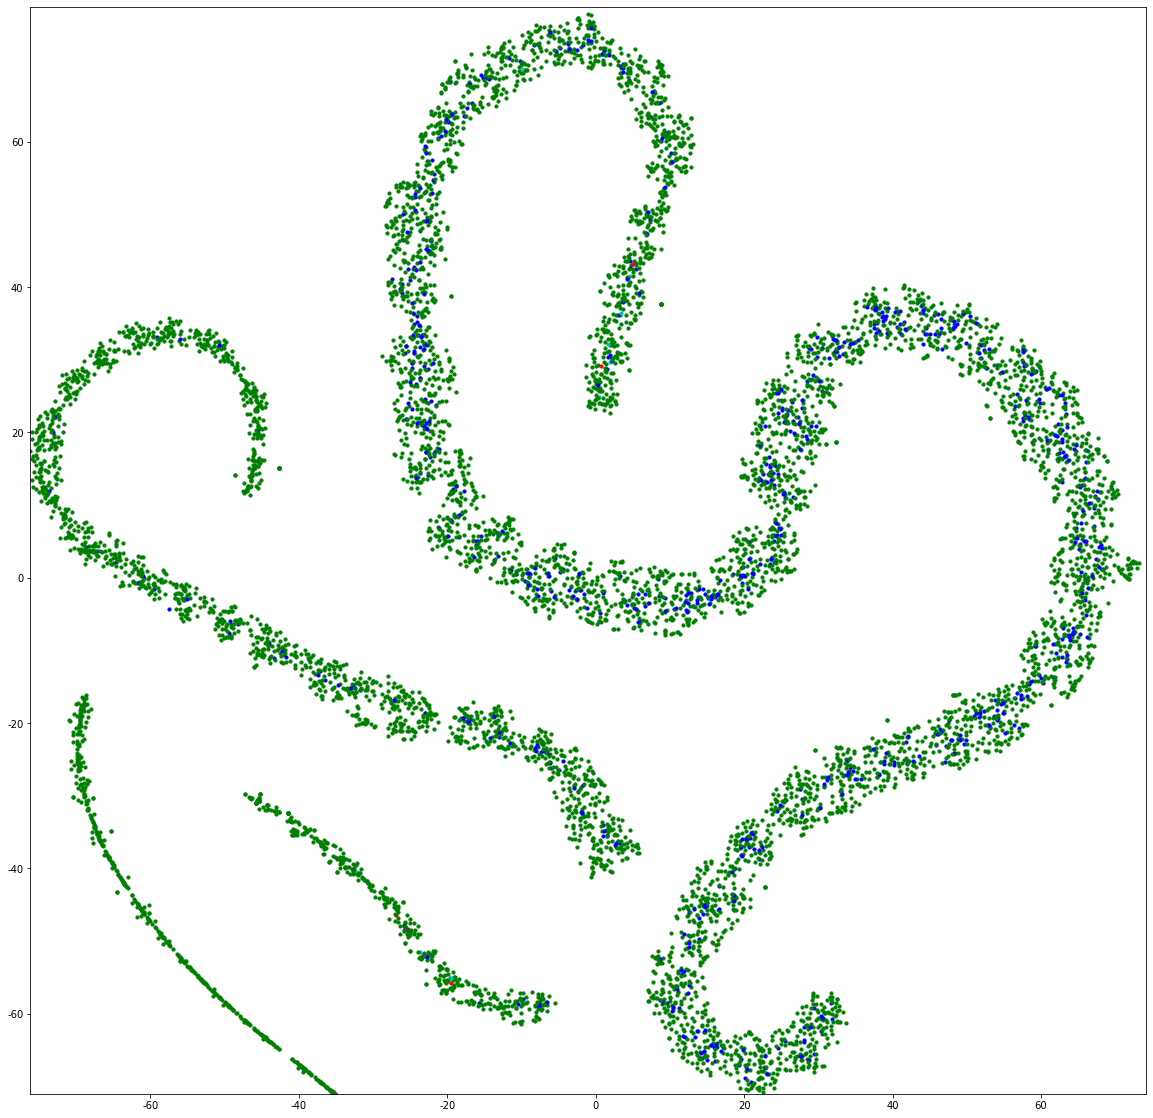

In [55]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    elif topics_num[i] == 3:
        color = 'b'
    else:
        color = 'g'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

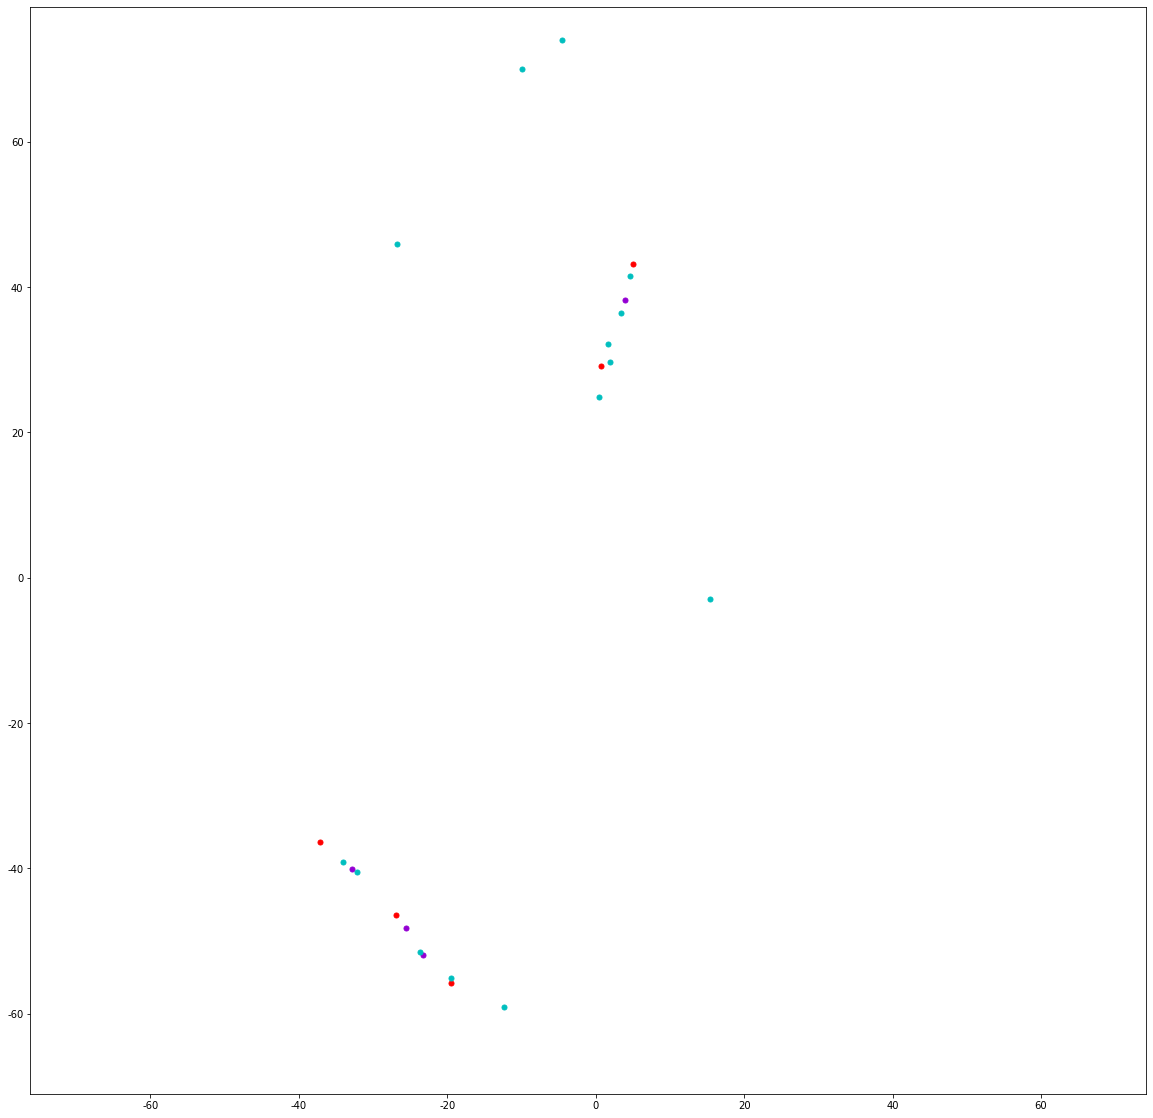

In [60]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 3 or topics_num[i] == 1:
        continue
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    # elif topics_num[i] == 3:
        # color = 'b'
    # else:
        # color = 'g'
        
    size = 25
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

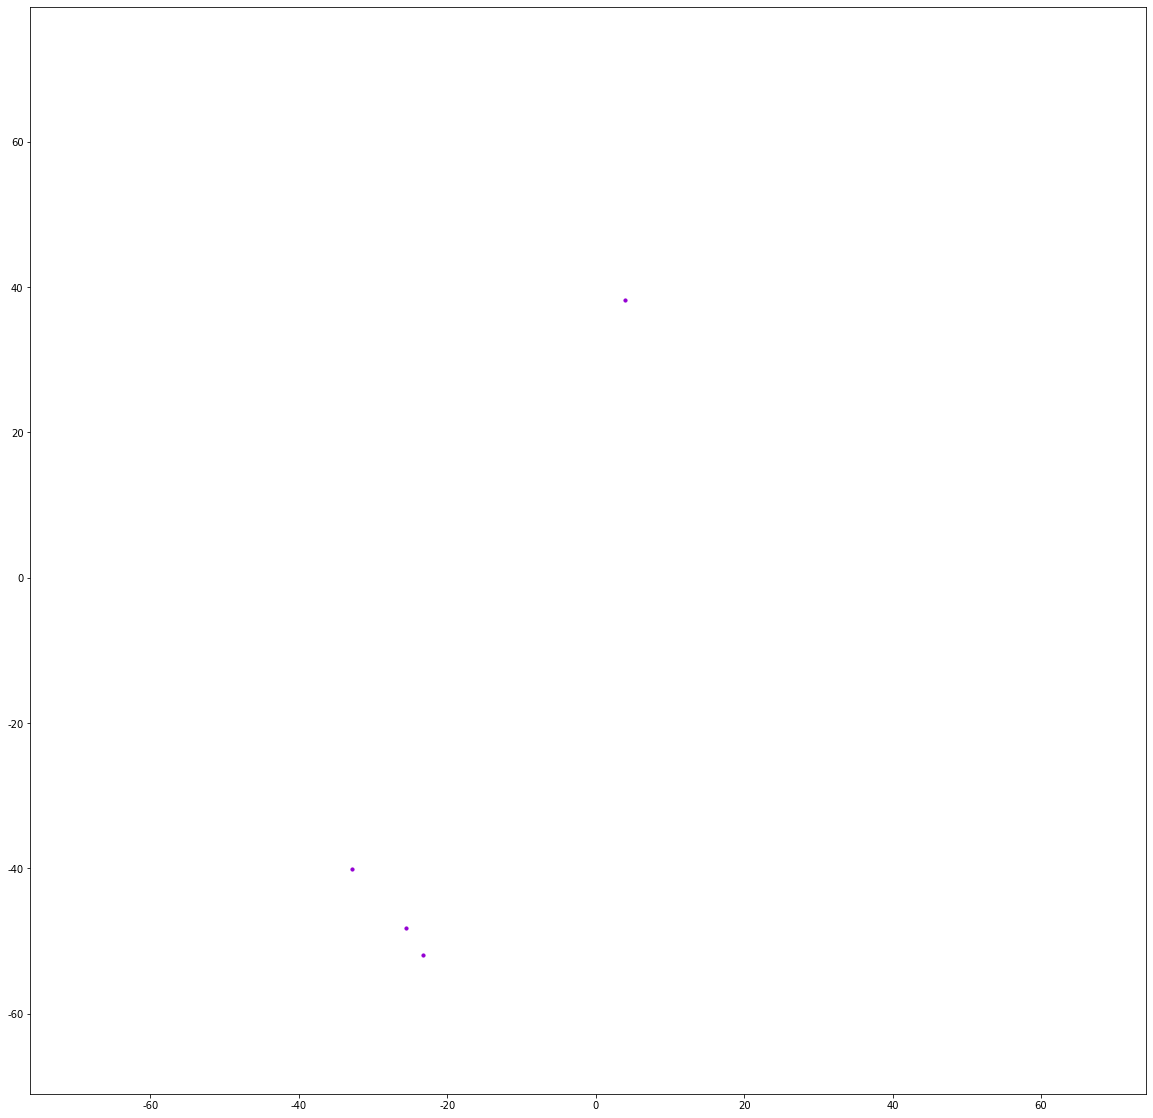

In [38]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 3 or topics_num[i] == 1:
        continue
    if topics_num[i] == 10:
        color = 'darkviolet'
        
        size = 10
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

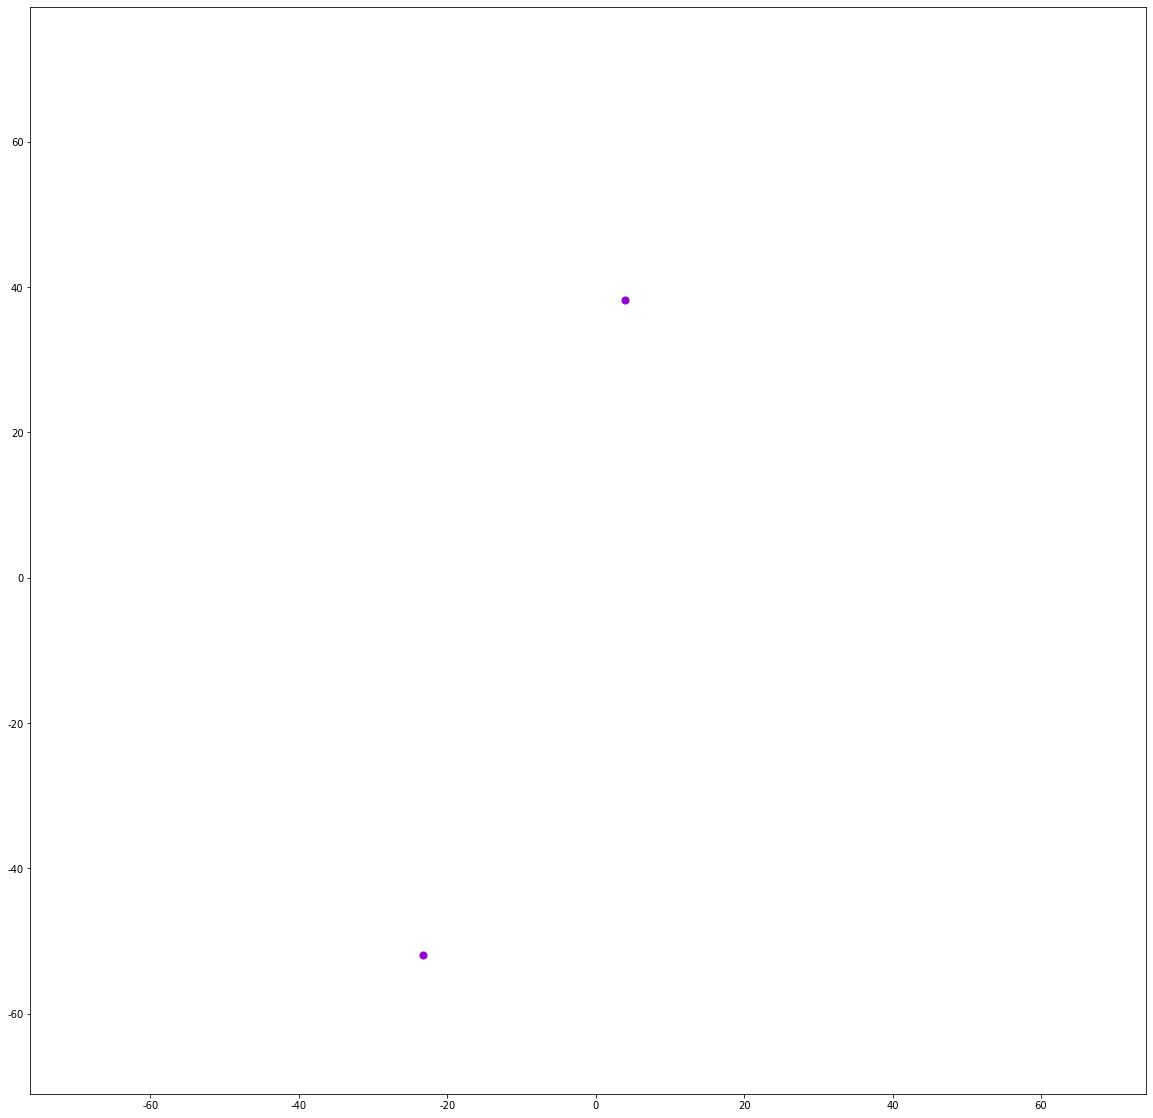

In [62]:
communities_10_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'darkviolet'

size = 50

for i in range(len(data)):
    if topics_num[i] == 10:
        if data_tsne[i,1]> 20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_10_1.append(filenames[i])
        if data_tsne[i,1] < -50:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_10_2.append(filenames[i])

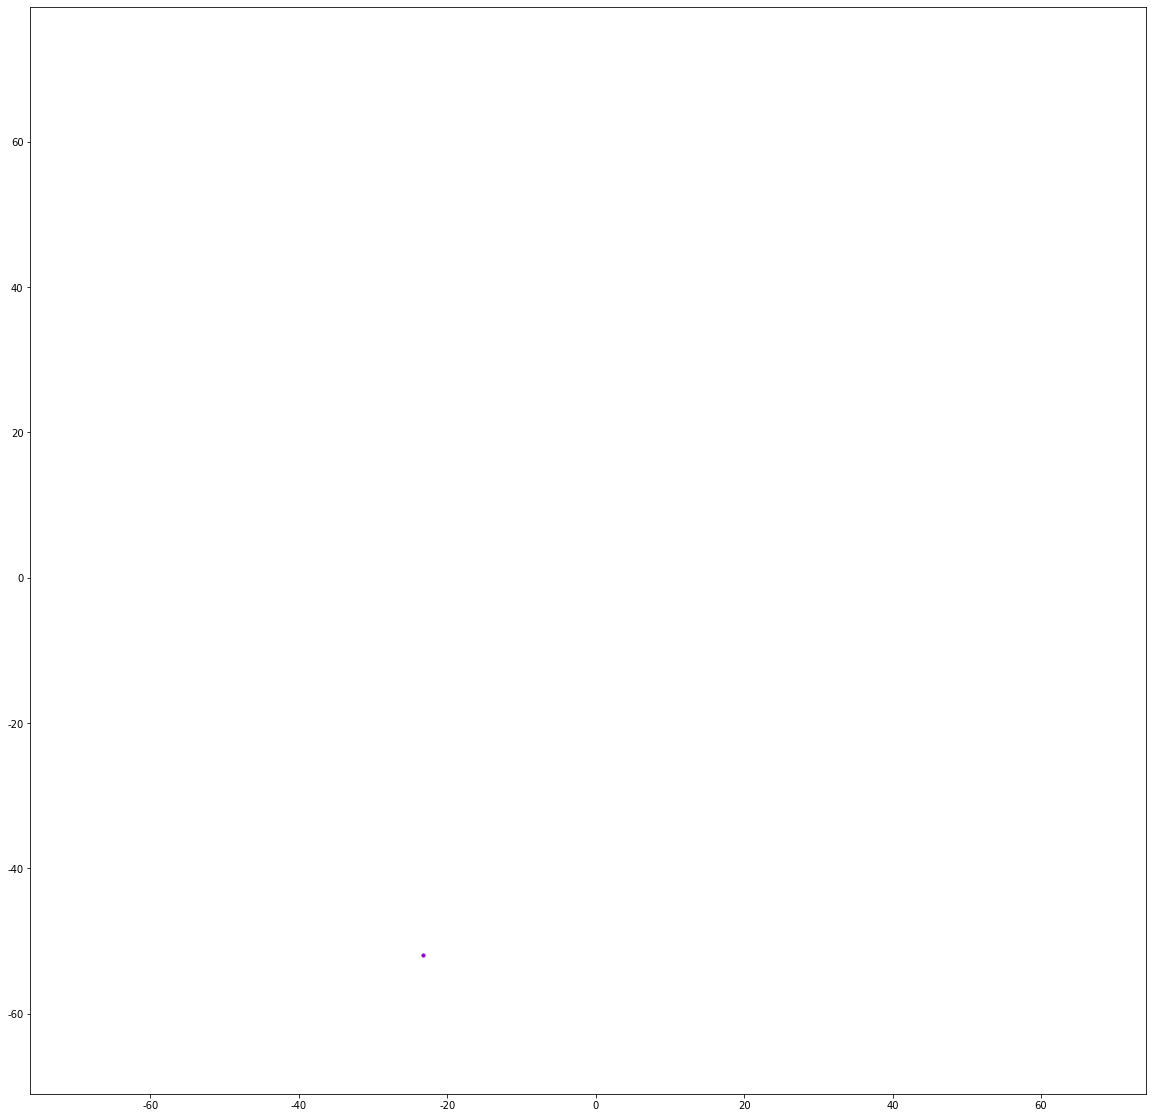

In [45]:
communities_10_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'darkviolet'

for i in range(len(data)):
    if topics_num[i] == 10:
        if data_tsne[i,1] < -50:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_10_2.append(filenames[i])

In [46]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_10_1), word_count_and_tf_idf_similarity(communities_10_2)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('dae', 4.0), ('think', 3.0))

2: (('life', 2.0), ('anxiety', 3.0))

3: (('therapy', 2.0), ('new', 2.0))

4: (('year', 2.0), ('depression', 2.0))

5: (('something', 1.0), ('thought', 2.0))

6: (('diagnosed', 1.0), ('life', 2.0))

7: (('parent', 1.0), ('deal', 1.0))

8: (('made', 1.0), ('best', 1.0))

9: (('stop', 1.0), ('stop', 1.0))

10: (('looking', 1.0), ('read', 1.0))

11: (('night', 1.0), ('due', 1.0))

12: (('today', 1.0), ('today', 1.0))

13: (('normal', 1.0), ('normal', 1.0))

14: (('abuse', 1.0), ('day', 1.0))

15: (('day', 1.0), ('suicidal', 1.0))

16: (('child', 1.0), ('cause', 1.0))

17: (('medication', 1.0), ('kill', 1.0))

18: (('suicidal', 1.0), ('time', 1.0))

19: (('psychosis', 1.0), ('health', 1.0))

20: (('kill', 1.0), ('sad', 1.0))

21: (('time', 1.0), ('this', 1.0))

22: (('cptsd', 1.0), ('daydreaming', 1.0))

23: (('health', 1.0), ('sleep', 1.0))

24: (('thought', 1.0), ('finally', 1.0))

25: (('voice', 1.0), ('wrong', 1.0))

26: (('this', 1.0), ('feeling', 1.

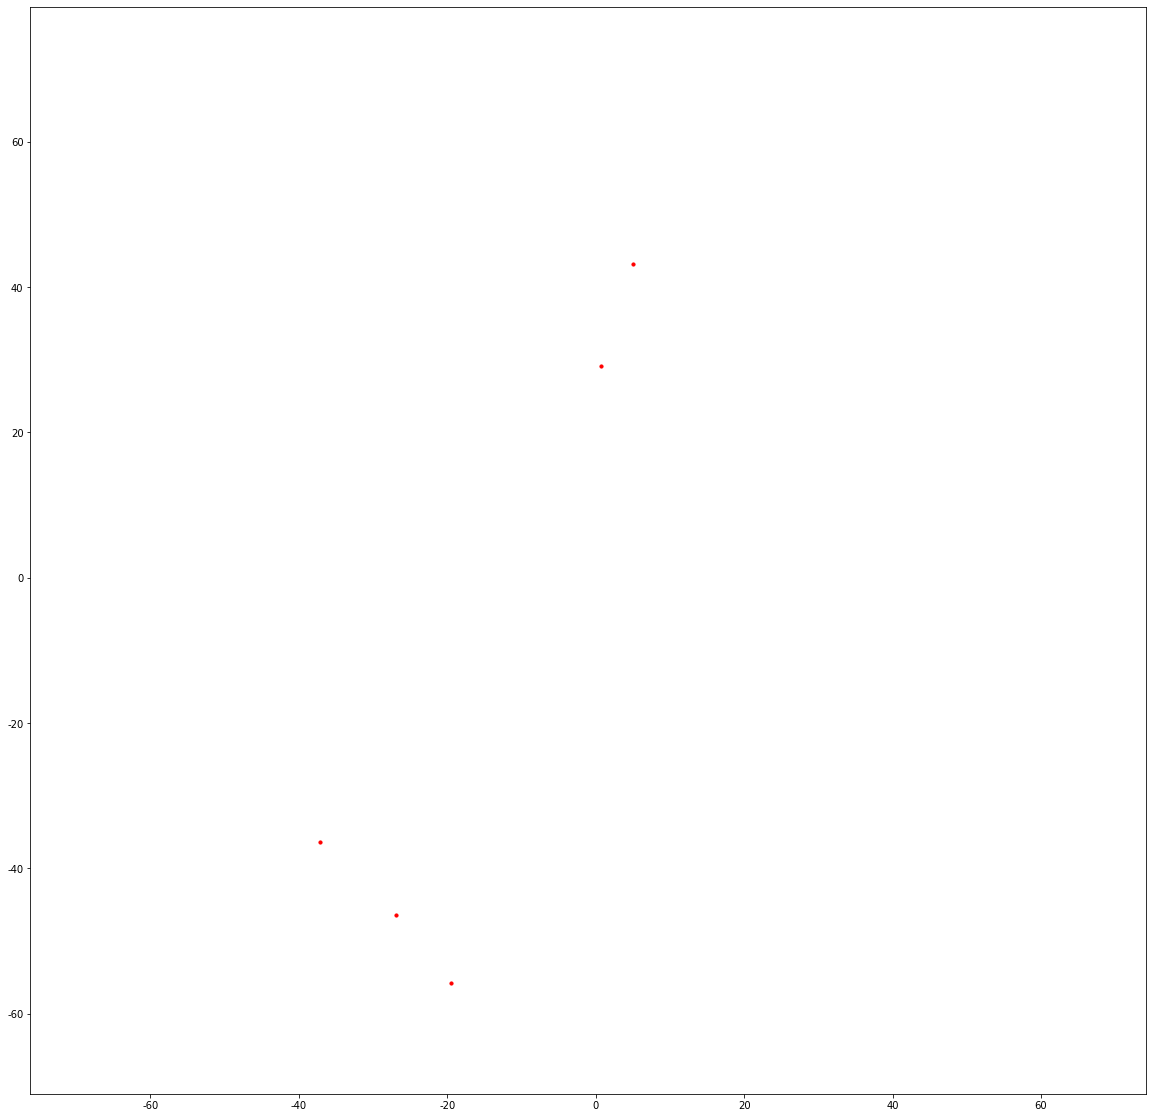

In [47]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 3 or topics_num[i] == 1:
        continue
    if topics_num[i] == 5:
        color = 'r'
        
        size = 10
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

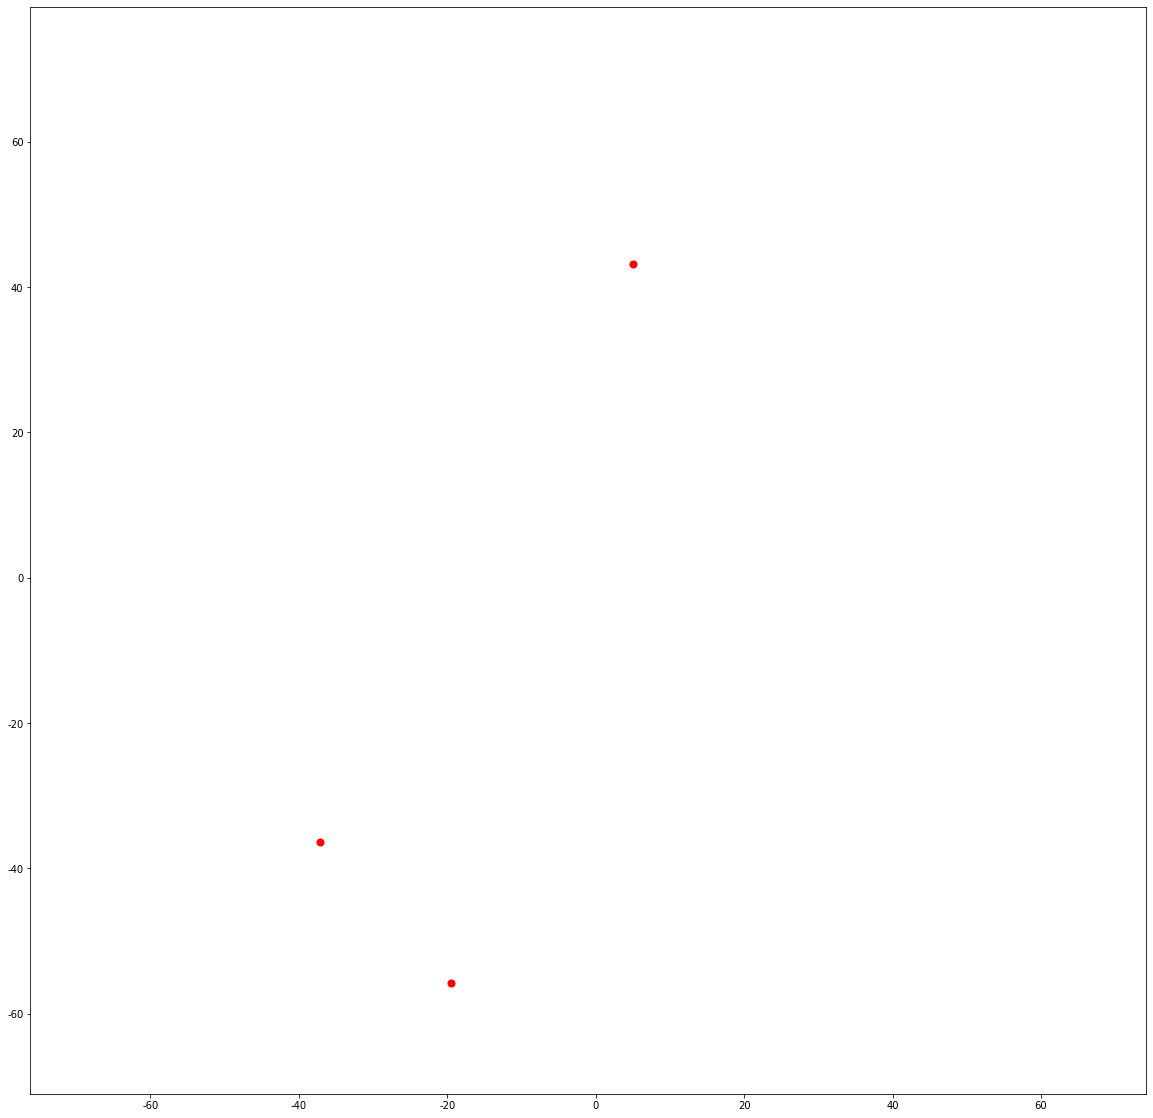

In [63]:
communities_5_1 = []
communities_5_2 = []
communities_5_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'r'

for i in range(len(data)):
    if topics_num[i] == 5:
        if data_tsne[i,1] > 40:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_1.append(filenames[i])
        if data_tsne[i,0] < -35:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_2.append(filenames[i])
        if data_tsne[i,1] < -54:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_3.append(filenames[i])

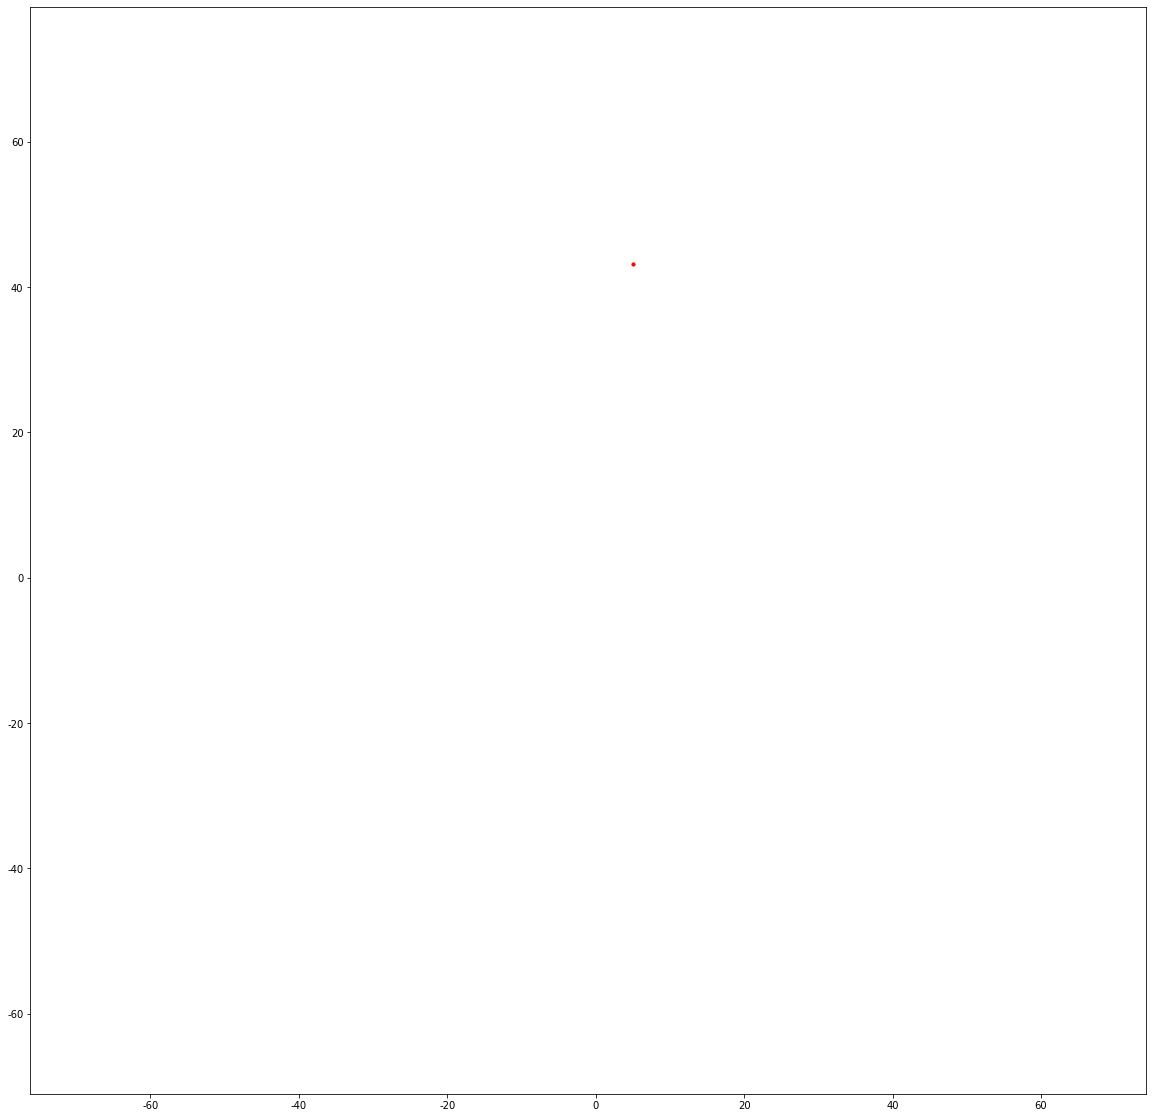

In [49]:
communities_5_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'r'

for i in range(len(data)):
    if topics_num[i] == 5:
        if data_tsne[i,1] > 40:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_1.append(filenames[i])

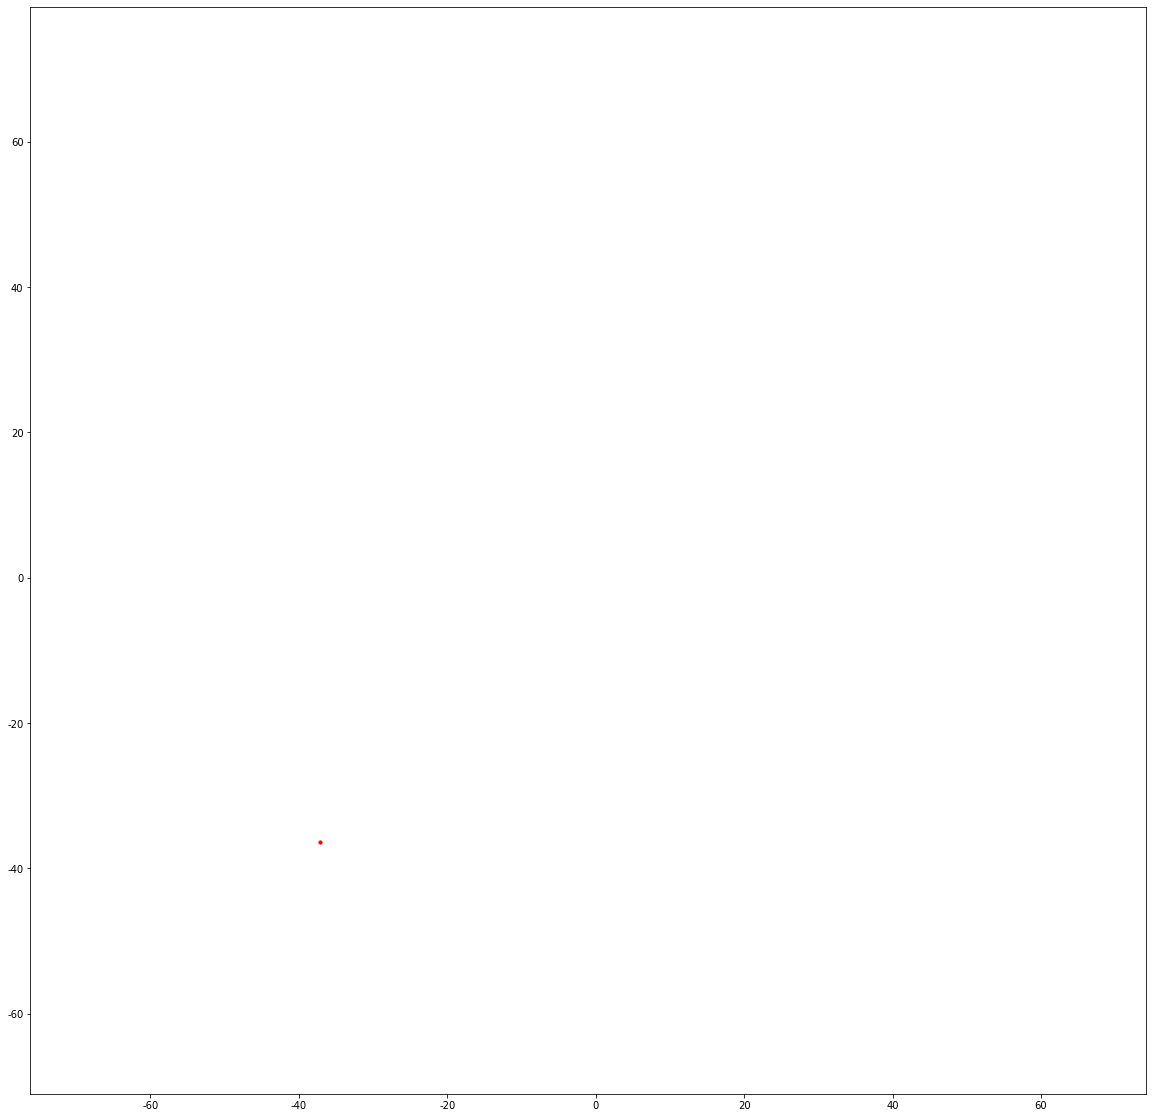

In [50]:
communities_5_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'r'

for i in range(len(data)):
    if topics_num[i] == 5:
        if data_tsne[i,0] < -35:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_2.append(filenames[i])

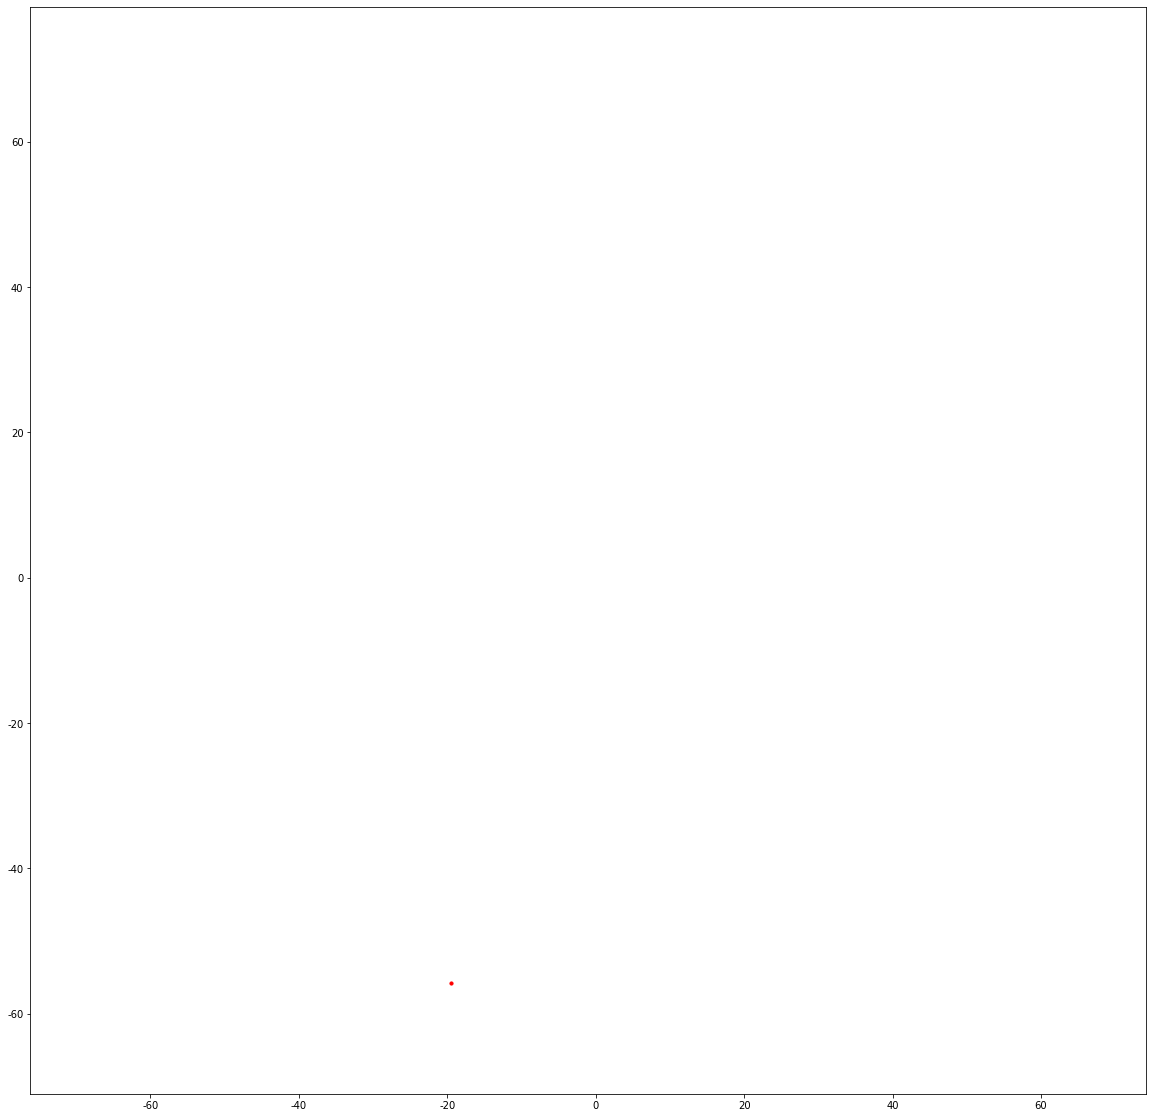

In [51]:
communities_5_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'r'

for i in range(len(data)):
    if topics_num[i] == 5:
        if data_tsne[i,1] < -54:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_3.append(filenames[i])

In [64]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_5_1), word_count_and_tf_idf_similarity(communities_5_2),
                word_count_and_tf_idf_similarity(communities_5_3)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('angry', 5.0), ('suicide', 2.0), ('friend', 3.0))

2: (('anger', 5.0), ('life', 2.0), ('year', 3.0))

3: (('need', 3.0), ('friend', 2.0), ('today', 2.0))

4: (('stop', 2.0), ('today', 2.0), ('clean', 2.0))

5: (('friend', 2.0), ('think', 2.0), ('time', 2.0))

6: (('hurt', 2.0), ('suicidal', 2.0), ('depression', 2.0))

7: (('something', 1.0), ('need', 2.0), ('harm', 2.0))

8: (('depressed', 1.0), ('kill', 2.0), ('month', 2.0))

9: (('game', 1.0), ('time', 2.0), ('find', 1.0))

10: (('one', 1.0), ('hate', 2.0), ('suicide', 1.0))

11: (('advice', 1.0), ('depressed', 1.0), ('much', 1.0))

12: (('life', 1.0), ('love', 1.0), ('cut', 1.0))

13: (('due', 1.0), ('one', 1.0), ('struggling', 1.0))

14: (('new', 1.0), ('advice', 1.0), ('advice', 1.0))

15: (('today', 1.0), ('christmas', 1.0), ('one', 1.0))

16: (('good', 1.0), ('end', 1.0), ('stop', 1.0))

17: (('baby', 1.0), ('right', 1.0), ('extremely', 1.0))

18: (('video', 1.0), ('relationship', 1.0), ('back', 1.0))

19: (('day', 1.0), ('

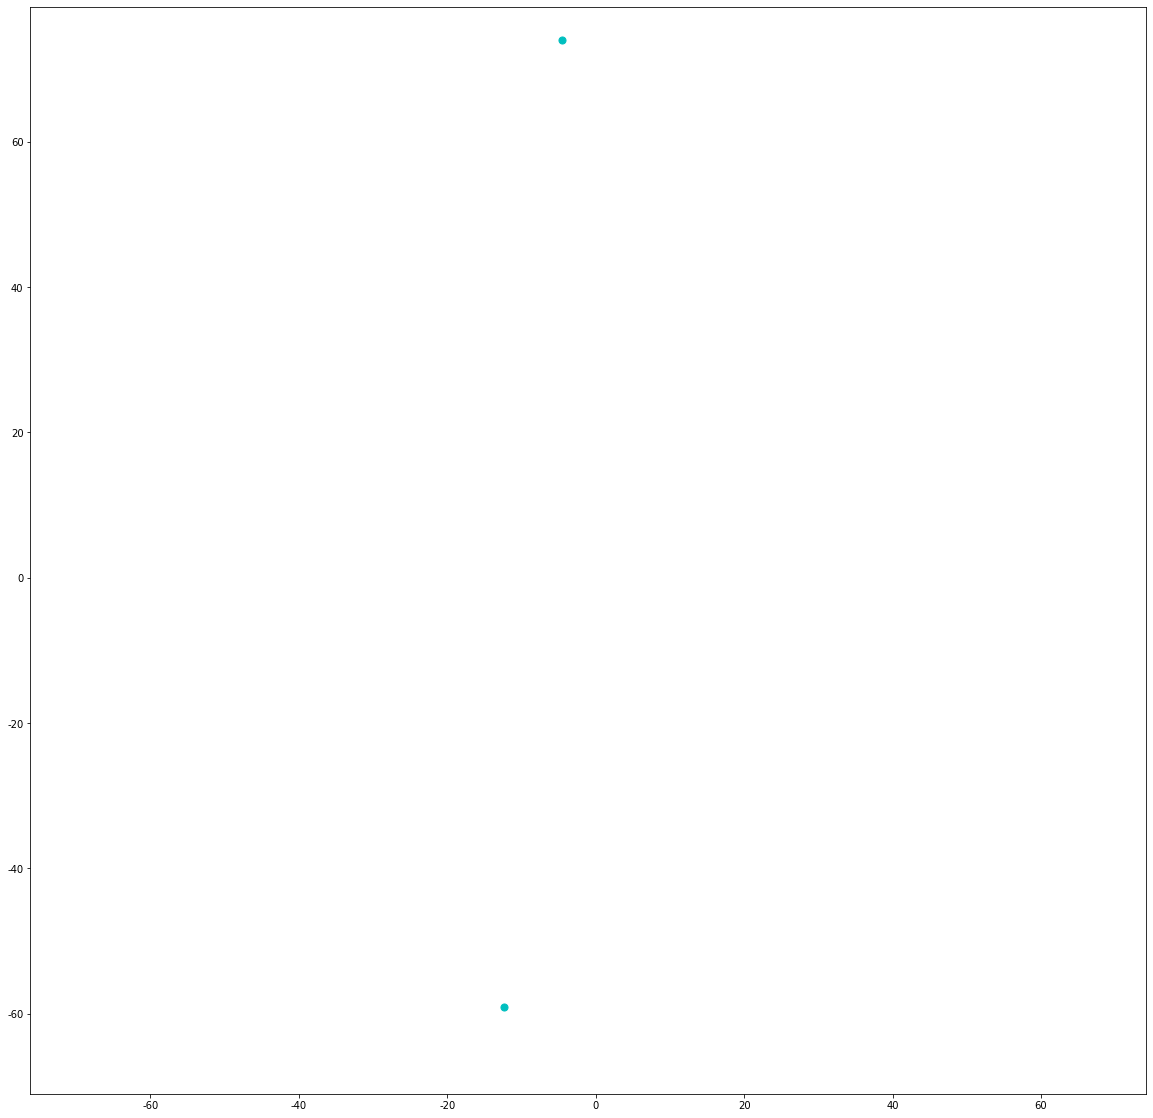

In [68]:
communities_4_1 = []
communities_4_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'c'

for i in range(len(data)):
    if topics_num[i] == 4:
        if data_tsne[i,1]> 73:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_4_1.append(filenames[i])
        if data_tsne[i,1] < -58:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_4_2.append(filenames[i])

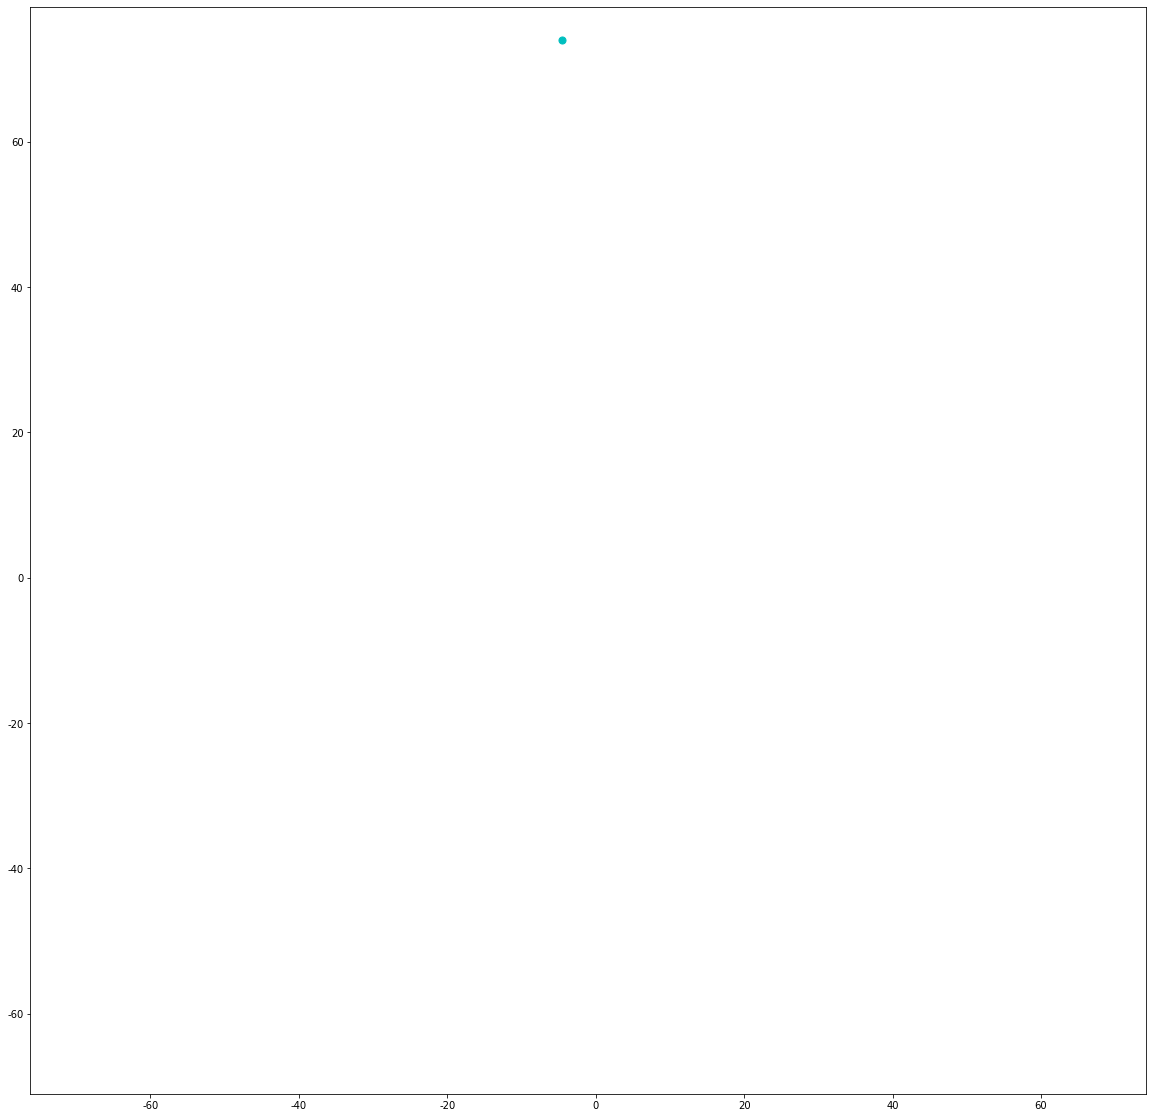

In [66]:
communities_4_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'c'

for i in range(len(data)):
    if topics_num[i] == 4:
        if data_tsne[i,1]> 73:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_4_1.append(filenames[i])

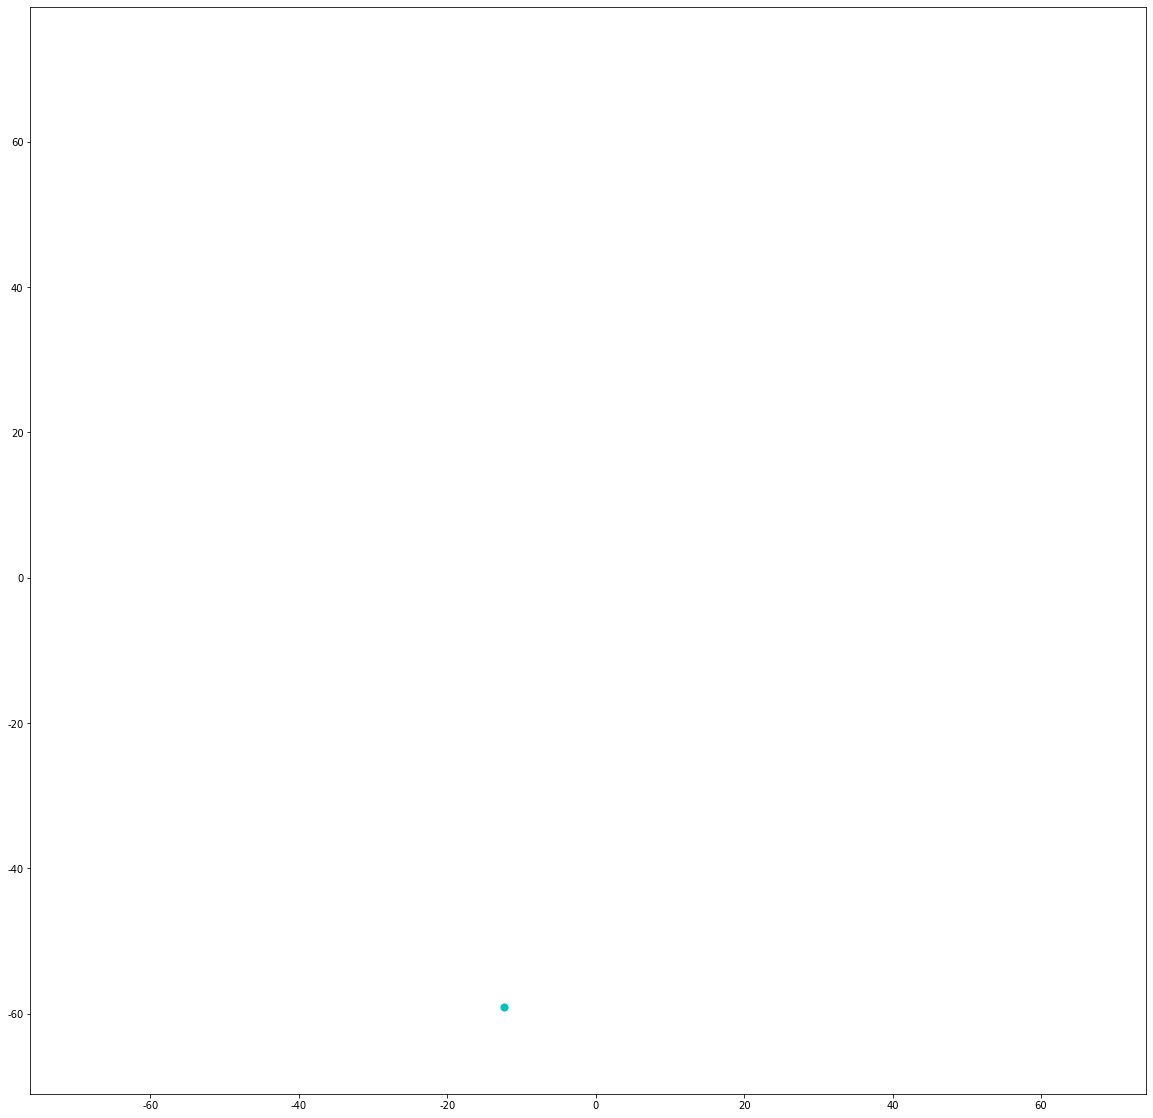

In [67]:
communities_4_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'c'

for i in range(len(data)):
    if topics_num[i] == 4:
        if data_tsne[i,1] < -58:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_4_2.append(filenames[i])

In [69]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_4_1), word_count_and_tf_idf_similarity(communities_4_2)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('friend', 2.0), ('life', 2.0))

2: (('kid', 1.0), ('die', 2.0))

3: (('wife', 1.0), ('scared', 2.0))

4: (('depressed', 1.0), ('depressed', 1.0))

5: (('best', 1.0), ('failing', 1.0))

6: (('brain', 1.0), ('therapist', 1.0))

7: (('parent', 1.0), ('tell', 1.0))

8: (('trying', 1.0), ('read', 1.0))

9: (('selfhrm', 1.0), ('school', 1.0))

10: (('guy', 1.0), ('back', 1.0))

11: (('stop', 1.0), ('wake', 1.0))

12: (('right', 1.0), ('birthday', 1.0))

13: (('looking', 1.0), ('better', 1.0))

14: (('way', 1.0), ('never', 1.0))

15: (('24f', 1.0), ('talk', 1.0))

16: (('lost', 1.0), ('day', 1.0))

17: (('subway', 1.0), ('think', 1.0))

18: (('numb', 1.0), ('suicidal', 1.0))

19: (('day', 1.0), ('he', 1.0))

20: (('unemployed', 1.0), ('worse', 1.0))

21: (('think', 1.0), ('need', 1.0))

22: (('yet', 1.0), ('world', 1.0))

23: (('suicidal', 1.0), ('men', 1.0))

24: (('need', 1.0), ('detached', 1.0))

25: (('ok', 1.0), ('college', 1.0))

26: (('kill', 1.0), ('depression', 1.0))

27: (('tim

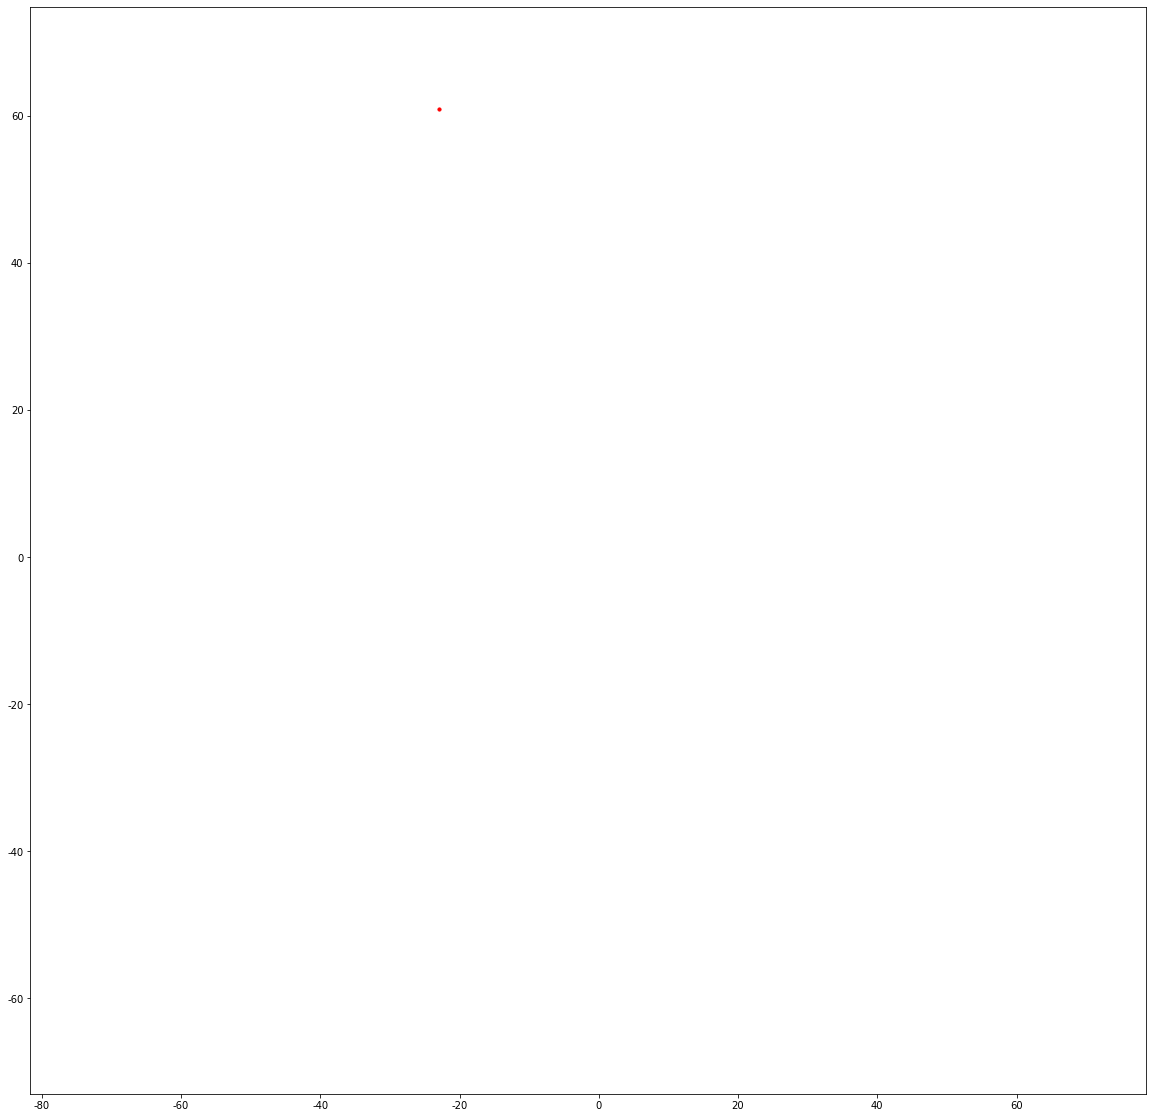

In [15]:
communities = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 4:
        if data_tsne[i,1]> 50:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities.append(filenames[i])

In [18]:
word_count_and_tf_idf_similarity(communities, 4)

[('feeling', 2.0),
 ('depression', 2.0),
 ('idk', 1.0),
 ('taking', 1.0),
 ('future', 1.0),
 ('always', 1.0),
 ('probably', 1.0),
 ('motivation', 1.0),
 ('wait', 1.0),
 ('bright', 1.0),
 ('post', 1.0),
 ('thought', 1.0),
 ('m15', 1.0),
 ('hate', 1.0),
 ('ill', 1.0),
 ('never', 1.0),
 ('unexist', 1.0),
 ('problem', 1.0),
 ('one', 1.0),
 ('hug', 1.0),
 ('antidepressant', 1.0),
 ('kill', 1.0),
 ('wonâ€™t', 1.0),
 ('first', 1.0),
 ('showing', 1.0),
 ('experience', 1.0),
 ('put', 1.0),
 ('reddit', 1.0),
 ('need', 1.0),
 ('lost', 1.0),
 ('ive', 1.0),
 ('iâ€˜m', 1.0),
 ('lot', 1.0),
 ('literally', 1.0),
 ('friend', 1.0),
 ('gambling', 1.0),
 ('start', 1.0),
 ('anxiety', 1.0)]

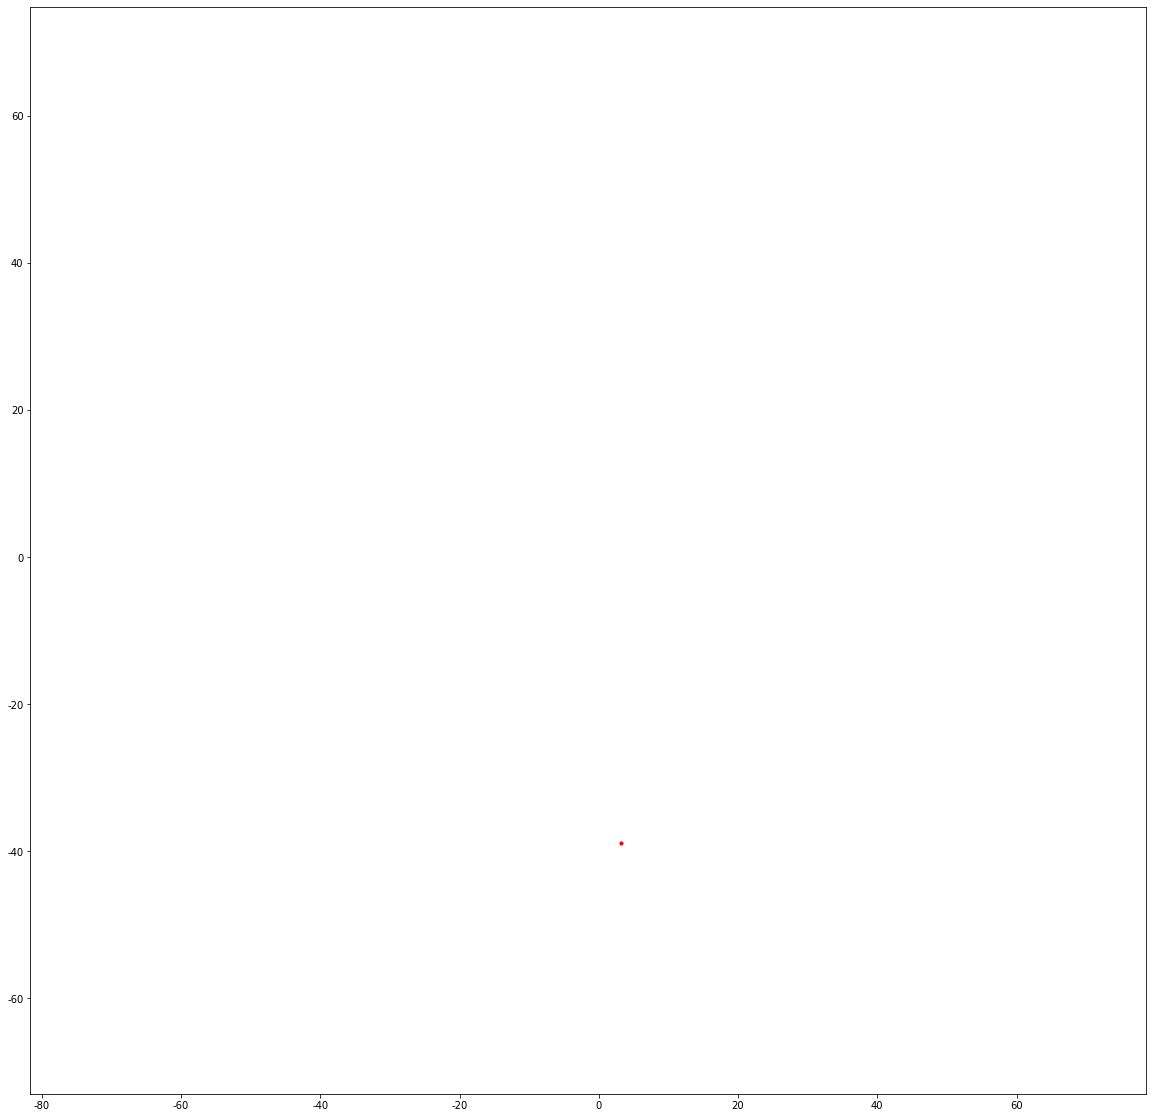

In [19]:
communities2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 5:
        if data_tsne[i,1]< -38:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities2.append(filenames[i])

In [20]:
word_count_and_tf_idf_similarity(communities2, 5)

[('think', 2.0),
 ('suicide', 2.0),
 ('hate', 2.0),
 ('suicidal', 2.0),
 ('life', 2.0),
 ('today', 2.0),
 ('kill', 2.0),
 ('need', 2.0),
 ('time', 2.0),
 ('friend', 2.0),
 ('right', 1.0),
 ('sad', 1.0),
 ('feeling', 1.0),
 ('lonely', 1.0),
 ('this', 1.0),
 ('thought', 1.0),
 ('relationship', 1.0),
 ('alone', 1.0),
 ('shit', 1.0),
 ('christmas', 1.0),
 ('even', 1.0),
 ('advice', 1.0),
 ('hour', 1.0),
 ('end', 1.0),
 ('one', 1.0),
 ('done', 1.0),
 ('worst', 1.0),
 ('depression', 1.0),
 ('depressed', 1.0),
 ('talk', 1.0),
 ('year', 1.0),
 ('go', 1.0),
 ('die', 1.0),
 ('killing', 1.0),
 ('ive', 1.0),
 ('lost', 1.0),
 ('love', 1.0),
 ('fuck', 1.0),
 ('day', 1.0),
 ('alive', 1.0)]

In [17]:
all_tw = []
for filename in filenames:
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filename}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = sum(topics, [])
        all_tw.append(topics)
        
all_tw = list(set(sum(all_tw, [])))
all_tw_rst = [all_tw]

print(all_tw_rst)

[['foodâ€\x9d', 'yknow', 'sexy', 'avid', 'scholarship', 'measured', 'lorry', 'gained', 'study', 'furry', 'steal', 'phenomenal', 'ignorantly', '2hour', 'bee', 'fous', 'urine', 'horny', '150mg', 'ill', 'strange', 'firearm', 'agree', 'blog', 'hiccup', 'judge', 'luvox', 'masturbating', 'endlessly', 'whereâ€™s', 'opinionsadvice', 'interest', 'toshare', 'flexibility', 'handing', 'angst', 'messing', 'manipulative', 'taught', 'enoughenough', 'â€œsomethingâ€\x9d', 'additionally', 'suppose', 'entertain', 'niquil', 'isolate', 'unloved', 'aid', 'spell', 'starting', 'brown', 'asf', 'intelligent', 'rapist', 'several', 'howwhere', 'bodily', 'paper', 'sensitive', 'flunking', 'remind', 'confirmed', 'mailbox', 'effectively', 'censor', 'my', 'hcg', 'scroll', 'boundary', 'sexist', 'order', 'party', 'replaceable', 'idgaf', 'preventive', 'sloppiness', 'matchâ€™', 'morbid', 'flashback', 'mark', 'terrified', 'complex', 'painlesseasy', 'except', 'awful', 'saddens', 'warning', 'before', 'harmed', 'fictional', '

In [19]:
mean_vector_list = []
topics_num = []

# print(all_tw)

model = Word2Vec(all_tw_rst, min_count=1)

for filename in filenames:
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filename}', newline='') as f:
        reader = csv.reader(f)
        tws = list(reader)
        topics_num.append(len(tws))
        
        tws = sum(tws, [])
        # print(tws)
        
        word_vector_list = []
        mean_vector = []
        word_vectors = model.wv
        
        for tw in tws:
            word_vector_list.append(word_vectors[tw].tolist())
        
        for element in zip(*word_vector_list):
            mean_vector.append(float(np.mean(element)))
        
        mean_vector_list.append(mean_vector)

In [20]:
# convert list to np.array
mean_vector_array = np.array(mean_vector_list)
print(mean_vector_array)

[[ 3.17781626e-03  6.22403224e-03 -3.11979834e-03 ... -8.55249735e-04
  -1.57357560e-03  1.29031730e-03]
 [-2.72758122e-03  1.09690544e-03 -1.98628681e-03 ... -1.07897050e-03
  -2.44814320e-05  2.13863630e-03]
 [ 1.39900867e-04 -1.39332029e-03  8.73743091e-04 ... -9.38271452e-04
  -2.35323529e-03  4.72018564e-03]
 ...
 [-6.76733468e-04  1.44238178e-03 -4.57426300e-04 ...  5.60303542e-04
  -8.20320976e-04 -3.16317857e-03]
 [-6.23899221e-04 -1.43003976e-04  4.12664274e-03 ... -9.12779558e-04
  -3.53354566e-03 -9.19955783e-05]
 [-7.61171512e-04  4.23560617e-04  4.55376464e-03 ...  2.77899578e-04
  -1.51569588e-03  1.81479733e-03]]


In [21]:
from sklearn.manifold import TSNE

data = mean_vector_array
print(type(data))
print(data)
# n_components = 2

# model = TSNE(n_components=n_components)
# print(model.fit_transform(data))

plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[ 3.17781626e-03  6.22403224e-03 -3.11979834e-03 ... -8.55249735e-04
  -1.57357560e-03  1.29031730e-03]
 [-2.72758122e-03  1.09690544e-03 -1.98628681e-03 ... -1.07897050e-03
  -2.44814320e-05  2.13863630e-03]
 [ 1.39900867e-04 -1.39332029e-03  8.73743091e-04 ... -9.38271452e-04
  -2.35323529e-03  4.72018564e-03]
 ...
 [-6.76733468e-04  1.44238178e-03 -4.57426300e-04 ...  5.60303542e-04
  -8.20320976e-04 -3.16317857e-03]
 [-6.23899221e-04 -1.43003976e-04  4.12664274e-03 ... -9.12779558e-04
  -3.53354566e-03 -9.19955783e-05]
 [-7.61171512e-04  4.23560617e-04  4.55376464e-03 ...  2.77899578e-04
  -1.51569588e-03  1.81479733e-03]]
[[ 7.597471   -0.6036954 ]
 [ 3.924985    9.003994  ]
 [ 2.9187694   5.9312716 ]
 ...
 [ 0.70320207  9.891562  ]
 [ 2.3797045  -0.27507505]
 [ 0.80564064 -0.9815685 ]]


In [21]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    elif topics_num[i] == 3:
        color = 'b'
    # else:
        # color = 'g'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

KeyboardInterrupt: 

## global all topic words list

In [370]:
def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne")

all_topic_words = []

for i in range(len(filenames)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = sum(topics, [])
        s_tw = set(topics)
        all_topic_words.append(topics)
        
all_topic_words_from_all_files = sum(all_topic_words, [])
print(len(all_topic_words_from_all_files))

82795


In [17]:
def word_count_and_tf_idf_similarity(filenames, topic_num, print_word_count=False, average=True):
    all_topic_words = []
    len_files = len(filenames)
    
    
    # print(f'topic_num: {topic_num}')
    # print('')
    
    for i in range(len(filenames)):
        with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
            reader = csv.reader(f)
            topics = list(reader)
            topics = sum(topics, [])
            s_tw = set(topics)
            all_topic_words.append(topics)
           
            tw_count_list = []
        
            for tw in s_tw:
                tw_count_list.append([tw, topics.count(tw)])
            
            tw_count_dict = dict(tw_count_list)
            sorted_dict = sorted(tw_count_dict.items(), key = lambda item: item[1], reverse = True)
            
            if print_word_count:
                print(filenames[i])
                print(sorted_dict)
                print()
                
    all_topic_words = sum(all_topic_words, [])
    s_atw = set(all_topic_words)
    
    atw_count_list = []
    
    for tw in s_atw:
        if average:
            atw_count_list.append([tw, float(round(all_topic_words.count(tw) / len_files, 4))])
        else:
            atw_count_list.append([tw, all_topic_words.count(tw)])
        
    atw_count_dict = dict(atw_count_list)
    all_sorted_dict = sorted(atw_count_dict.items(), key = lambda item: item[1], reverse = True)
    
    #print('all topic words count')
    #print(all_sorted_dict)
    #print()
    
    # print(f'number of topic words: {len(all_topic_words)}, number of communities: {len(filenames)}')
    # print()
    # print(f'random tf-idf similarity: {tf_idf_similarity_from_list(random.sample(all_topic_words_from_all_files, len(all_topic_words)))}')
    # print(f'tf-idf similarity: {tf_idf_similarity_from_list(all_topic_words)}')
    
    return all_sorted_dict

# number of topic 10 and 5 and 4

## topic_nums = 10 (members >= 10000)

In [384]:
communities_10 = []
communities_5 = []
communities_4 = []


for i in range(len(data)):
    if topics_num[i] == 10:
        communities_10.append(filenames[i])
    elif topics_num[i] == 5:
        communities_5.append(filenames[i])
    elif topics_num[i] == 4:
        communities_4.append(filenames[i])

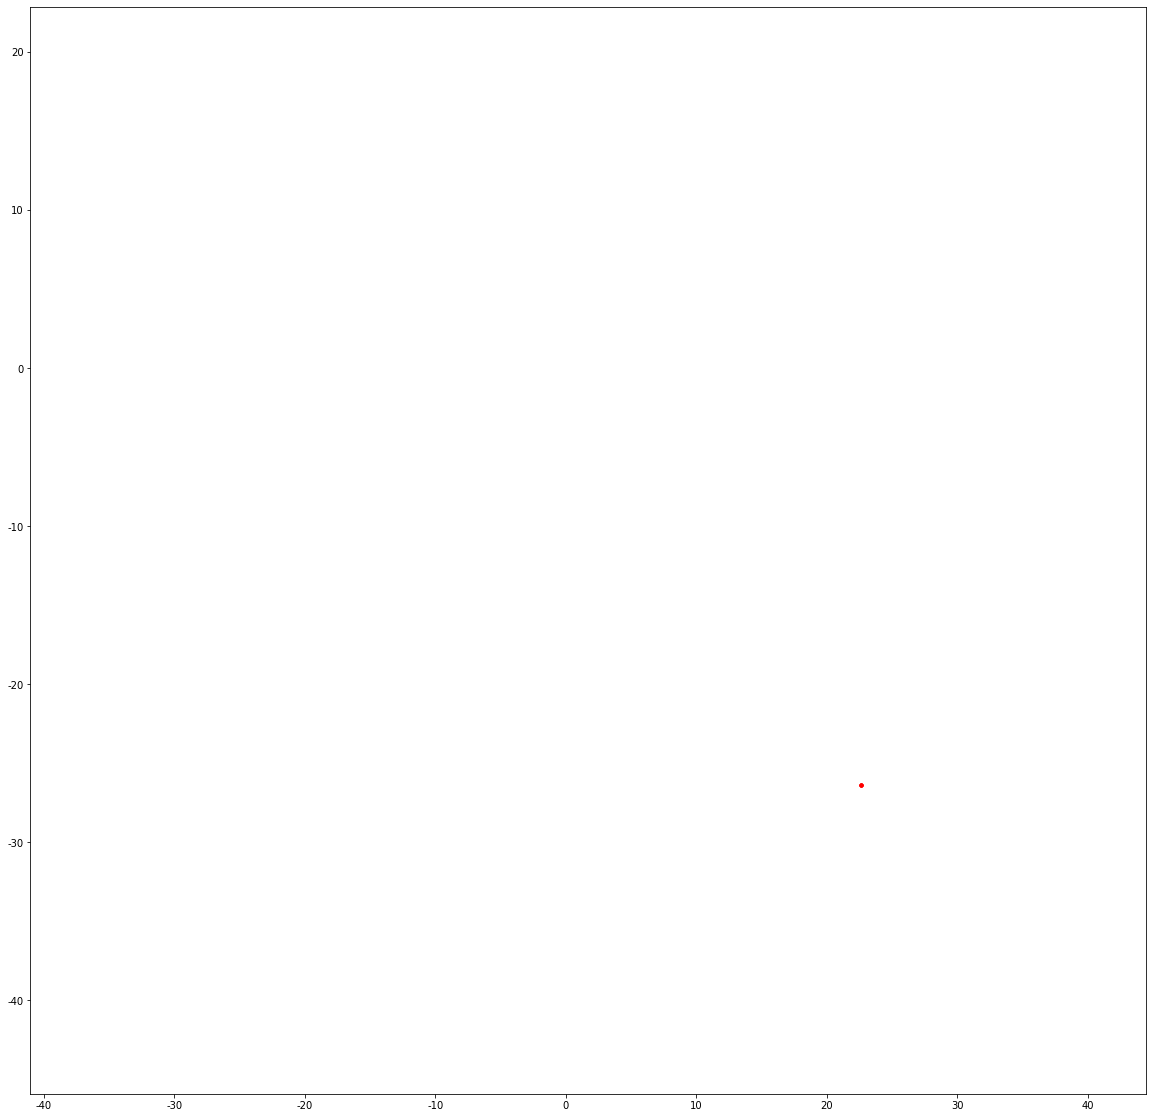

In [368]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 10:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

In [440]:
print(word_count_and_tf_idf_similarity(communities_10, 10))

[('life', 2.75),
 ('year', 2.25),
 ('today', 2.0),
 ('think', 1.75),
 ('need', 1.5),
 ('one', 1.5),
 ('hate', 1.5),
 ('anxiety', 1.25),
 ('thought', 1.25),
 ('first', 1.25),
 ('depression', 1.25),
 ('friend', 1.25),
 ('time', 1.25),
 ('stop', 1.0),
 ('depressed', 1.0),
 ('day', 1.0),
 ('even', 1.0),
 ('talk', 1.0),
 ('love', 1.0),
 ('tell', 1.0),
 ('go', 1.0),
 ('wish', 1.0),
 ('alone', 1.0),
 ('cry', 1.0),
 ('dae', 1.0),
 ('kill', 1.0),
 ('sleep', 0.75),
 ('advice', 0.75),
 ('best', 0.75),
 ('care', 0.75),
 ('lost', 0.75),
 ('better', 0.75),
 ('old', 0.75),
 ('suicide', 0.75),
 ('this', 0.75),
 ('finally', 0.75),
 ('mom', 0.75),
 ('therapist', 0.75),
 ('wrong', 0.75),
 ('relationship', 0.75),
 ('work', 0.75),
 ('sad', 0.75),
 ('suicidal', 0.75),
 ('job', 0.75),
 ('right', 0.75),
 ('parent', 0.75),
 ('feeling', 0.75),
 ('you', 0.75),
 ('therapy', 0.75),
 ('mental', 0.75),
 ('made', 0.75),
 ('week', 0.75),
 ('person', 0.75),
 ('fuck', 0.75),
 ('birthday', 0.75),
 ('tired', 0.75),
 ('cou

## topic_nums = 5 (members >= 1000)

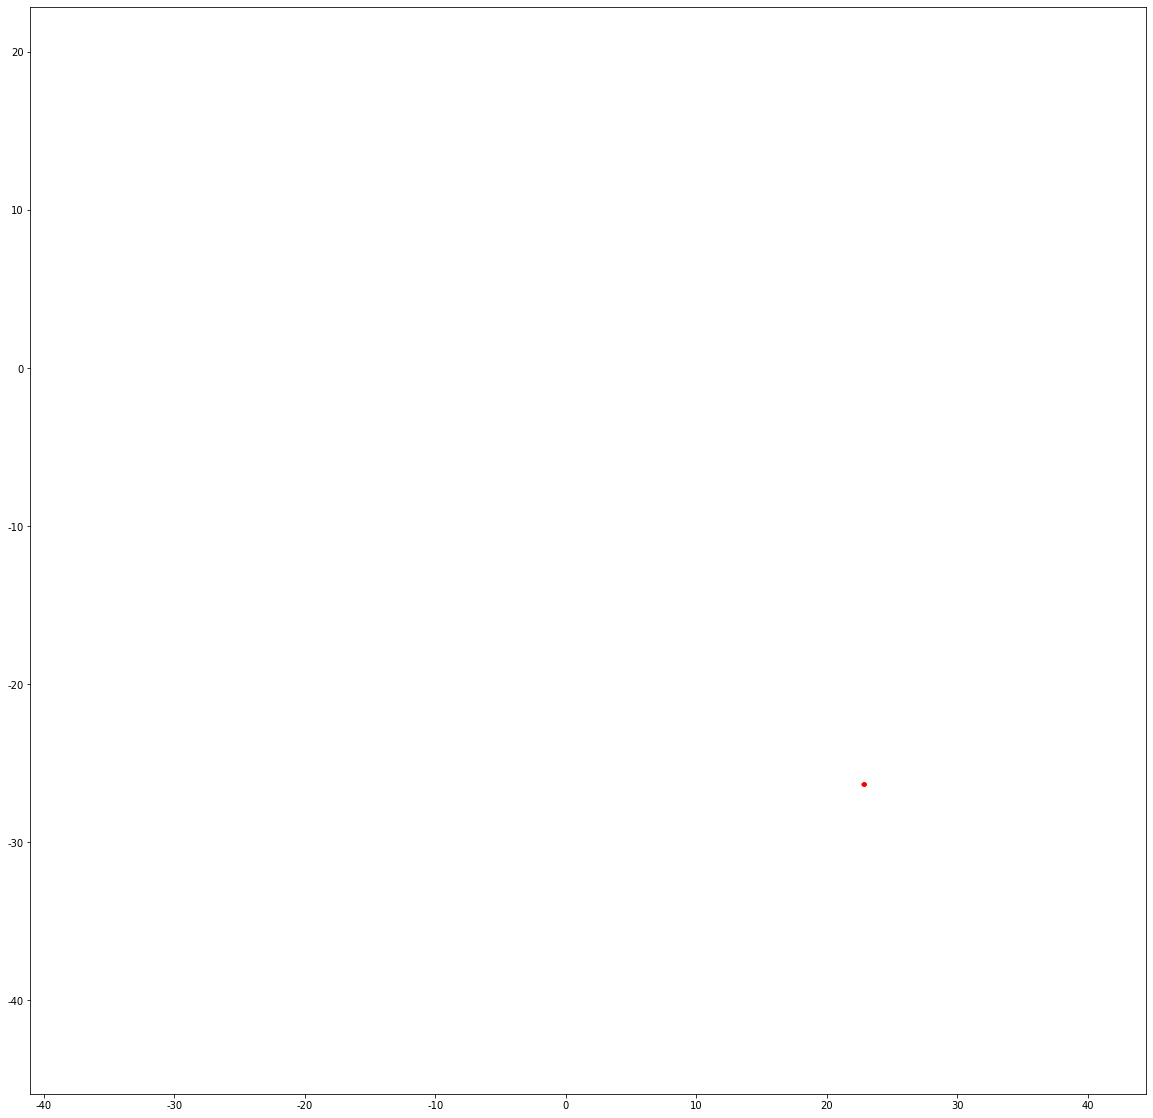

In [367]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 5:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)

plt.show()

In [441]:
word_count_and_tf_idf_similarity(communities_5, 5)

[('friend', 2.0),
 ('need', 1.8),
 ('life', 1.6),
 ('think', 1.6),
 ('depression', 1.4),
 ('time', 1.4),
 ('suicide', 1.2),
 ('today', 1.2),
 ('year', 1.2),
 ('kill', 1.2),
 ('advice', 1.0),
 ('one', 1.0),
 ('day', 1.0),
 ('angry', 1.0),
 ('go', 1.0),
 ('hate', 1.0),
 ('anger', 1.0),
 ('bullied', 0.8),
 ('stop', 0.8),
 ('bully', 0.8),
 ('bullying', 0.8),
 ('depressed', 0.8),
 ('feeling', 0.8),
 ('anxiety', 0.6),
 ('die', 0.6),
 ('suicidal', 0.6),
 ('thought', 0.6),
 ('fuck', 0.6),
 ('lost', 0.4),
 ('this', 0.4),
 ('month', 0.4),
 ('hurt', 0.4),
 ('harm', 0.4),
 ('existential', 0.4),
 ('say', 0.4),
 ('sad', 0.4),
 ('much', 0.4),
 ('school', 0.4),
 ('living', 0.4),
 ('end', 0.4),
 ('person', 0.4),
 ('crisis', 0.4),
 ('tired', 0.4),
 ('lonely', 0.4),
 ('find', 0.4),
 ('clean', 0.4),
 ('guy', 0.4),
 ('death', 0.2),
 ('mad', 0.2),
 ('universe', 0.2),
 ('stand', 0.2),
 ('music', 0.2),
 ('never', 0.2),
 ('killing', 0.2),
 ('care', 0.2),
 ('still', 0.2),
 ('everyone', 0.2),
 ('legit', 0.2),
 (

## topic_nums = 4 (members >= 100)

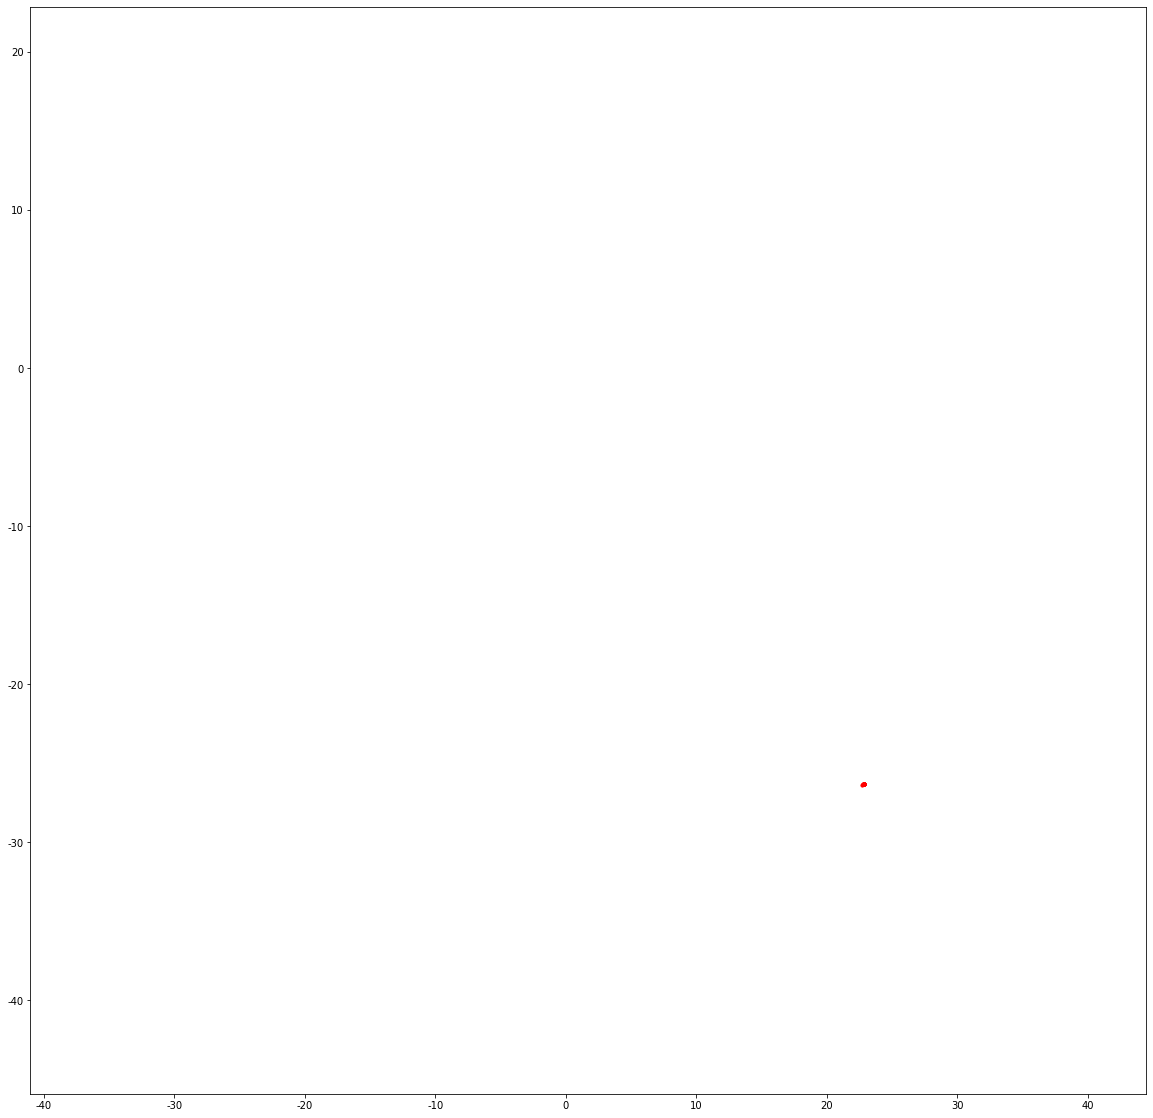

In [310]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 4:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

In [443]:
print(word_count_and_tf_idf_similarity(communities_4, 4))

[('need', 1.3571), ('depression', 1.3571), ('life', 1.2143), ('depressed', 0.8571), ('friend', 0.7857), ('hate', 0.7143), ('one', 0.6429), ('talk', 0.6429), ('think', 0.6429), ('year', 0.6429), ('kill', 0.6429), ('die', 0.5714), ('time', 0.5714), ('stop', 0.5), ('anxiety', 0.5), ('suicide', 0.5), ('today', 0.5), ('thought', 0.5), ('tired', 0.5), ('better', 0.4286), ('day', 0.4286), ('alone', 0.4286), ('feeling', 0.4286), ('advice', 0.3571), ('never', 0.3571), ('go', 0.3571), ('much', 0.3571), ('end', 0.3571), ('way', 0.3571), ('give', 0.3571), ('care', 0.2857), ('lost', 0.2857), ('back', 0.2857), ('nothing', 0.2857), ('ive', 0.2857), ('hair', 0.2857), ('first', 0.2857), ('old', 0.2143), ('even', 0.2143), ('tonight', 0.2143), ('work', 0.2143), ('sad', 0.2143), ('worse', 0.2143), ('cry', 0.2143), ('therapy', 0.2143), ('made', 0.2143), ('actually', 0.2143), ('alive', 0.2143), ('birthday', 0.2143), ('lonely', 0.2143), ('scared', 0.2143), ('best', 0.1429), ('idk', 0.1429), ('killing', 0.142

## topic_nums = 3 (members >= 10)

# 3-1)

In [264]:
communities_3 = []

for i in range(len(data)):
    if topics_num[i] == 3:
        communities_3.append(filenames[i])

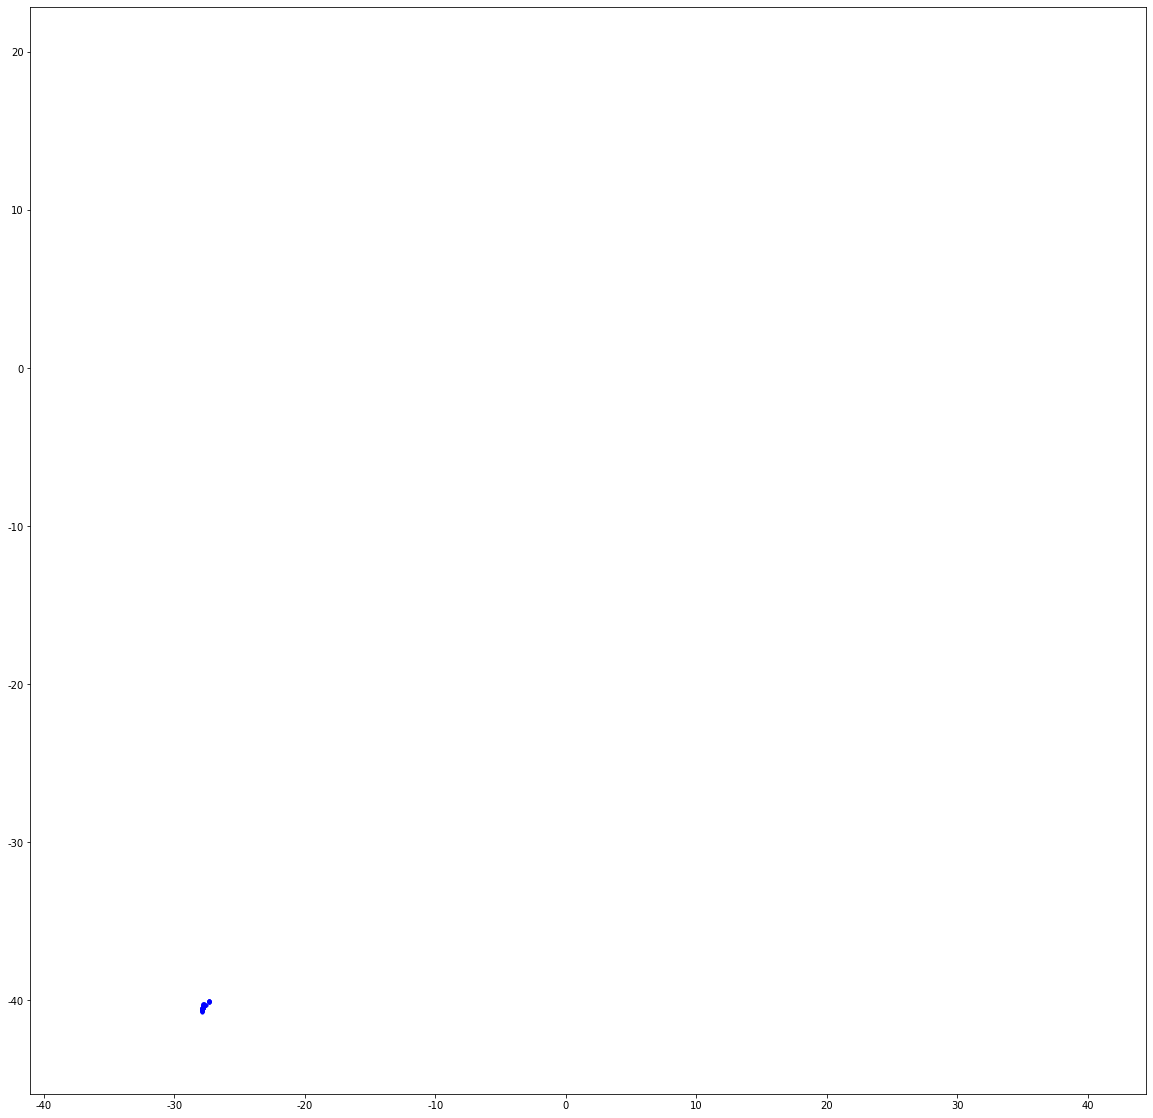

In [372]:
communities_3_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'b'

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -30 and data_tsne[i,0] < -20 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_1.append(filenames[i])

# 3-2)

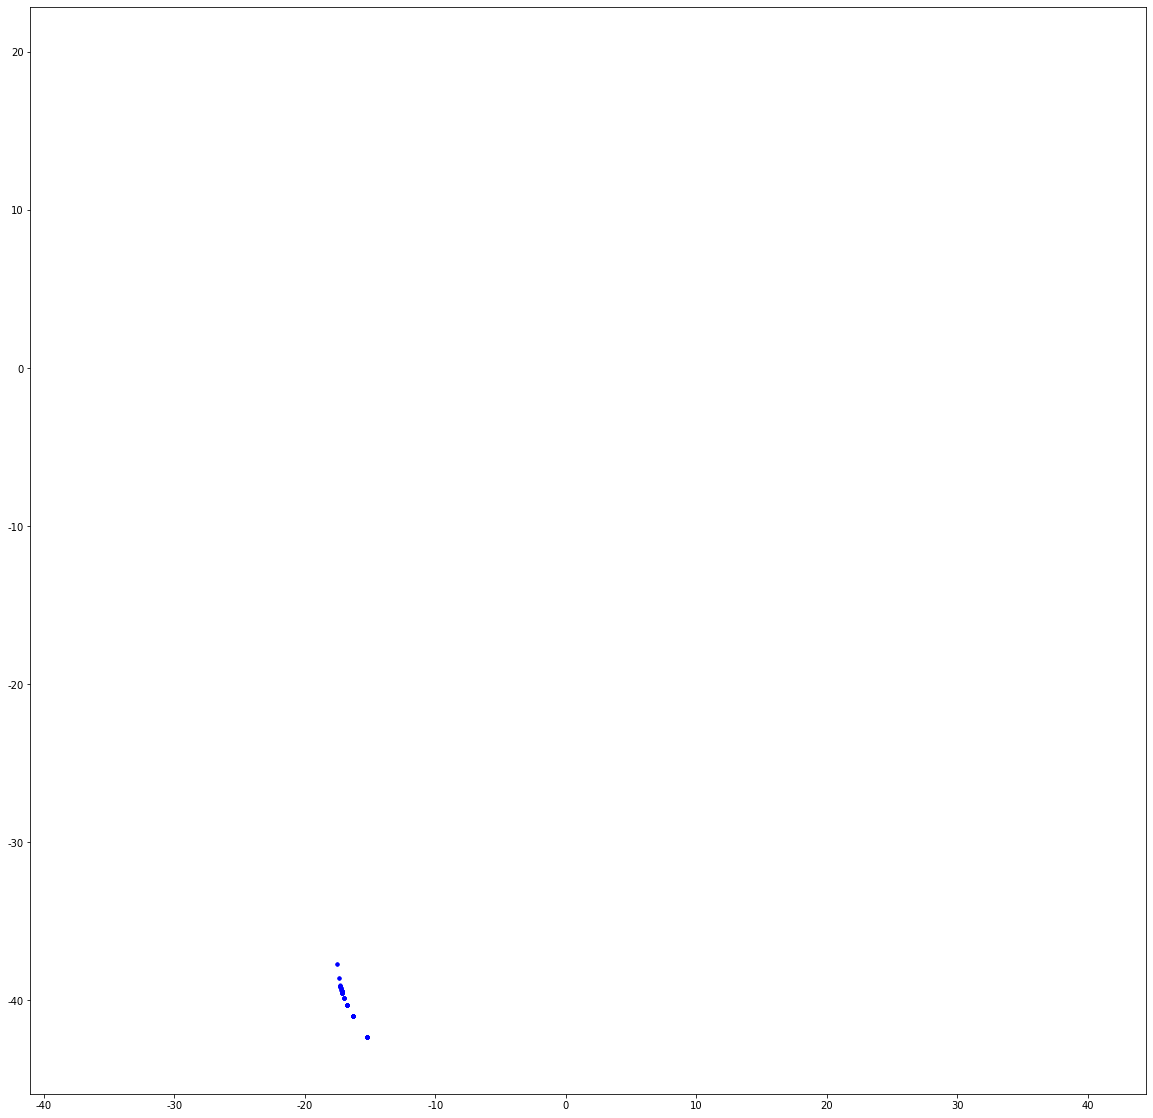

In [373]:
communities_3_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -20 and data_tsne[i,0] < -12:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_2.append(filenames[i])

# 3-3)

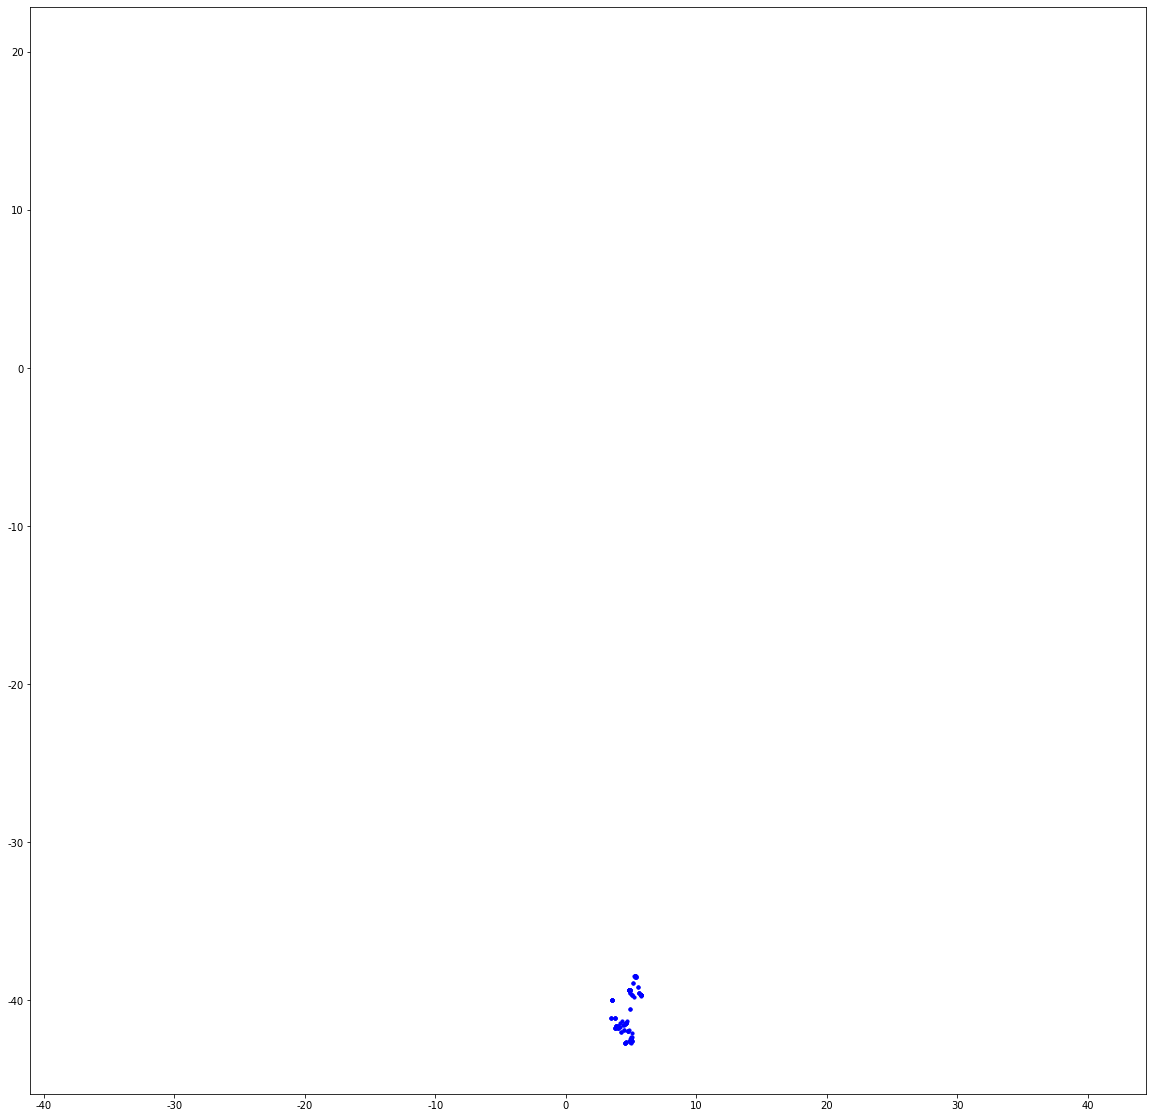

In [374]:
communities_3_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > 0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_3.append(filenames[i])

# 3-4)

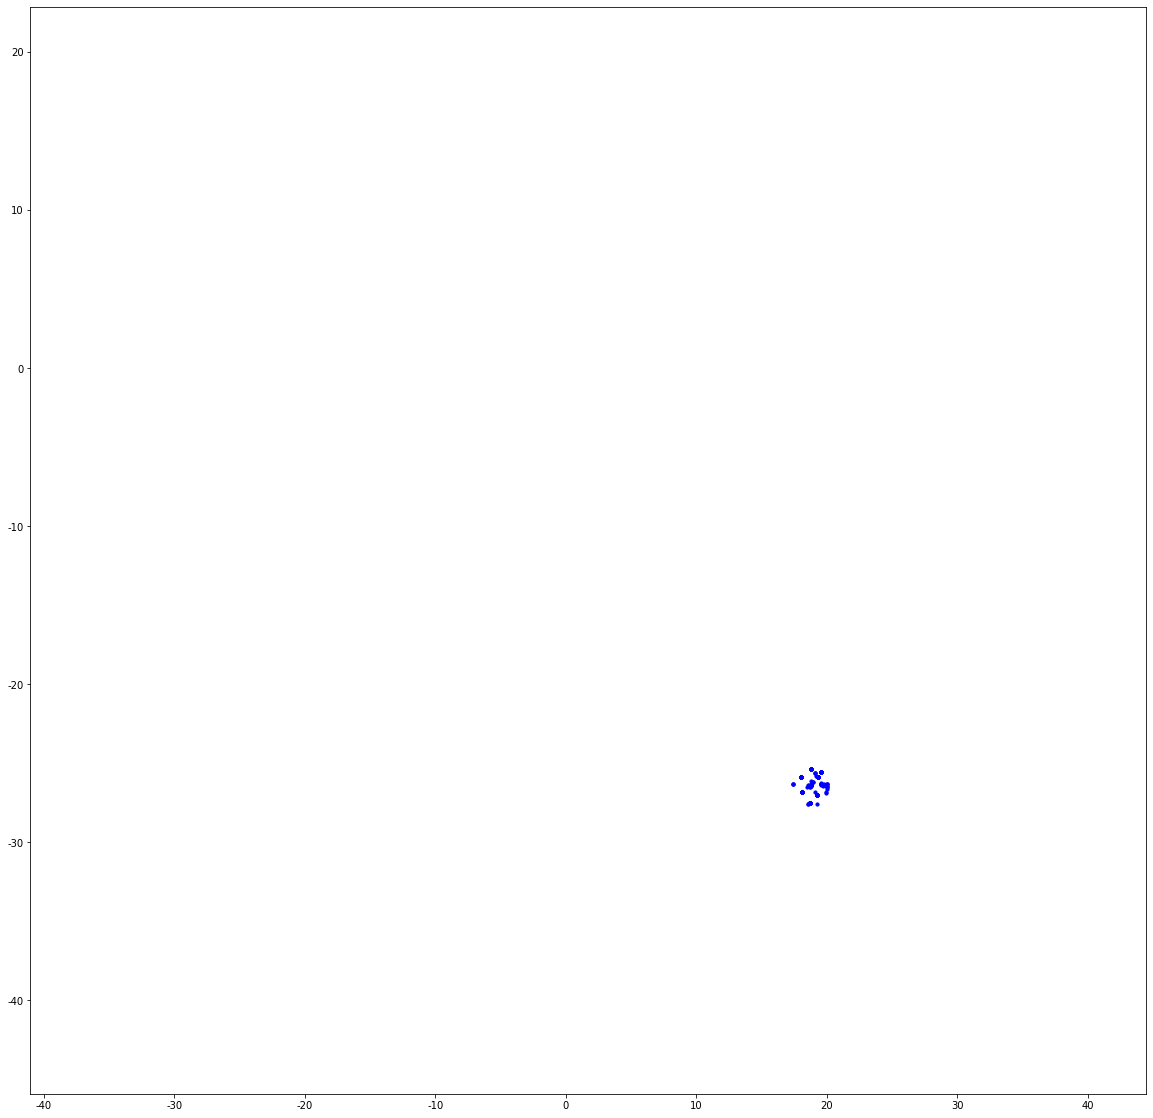

In [375]:
communities_3_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,1] > -30 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_4.append(filenames[i])

In [448]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_3_1, 3), word_count_and_tf_idf_similarity(communities_3_2, 3), 
                word_count_and_tf_idf_similarity(communities_3_3, 3), word_count_and_tf_idf_similarity(communities_3_4, 3)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('need', 0.5375), ('life', 0.495), ('life', 0.5111), ('life', 0.4281))

2: (('life', 0.525), ('need', 0.4158), ('depression', 0.4222), ('depression', 0.3028))

3: (('depression', 0.4125), ('die', 0.4158), ('need', 0.3611), ('need', 0.2936))

4: (('friend', 0.375), ('hate', 0.3465), ('friend', 0.3444), ('friend', 0.2875))

5: (('hate', 0.35), ('kill', 0.3366), ('year', 0.3111), ('think', 0.2385))

6: (('time', 0.3375), ('talk', 0.2871), ('think', 0.2889), ('kill', 0.2355))

7: (('talk', 0.3), ('lonely', 0.2772), ('day', 0.2778), ('depressed', 0.2232))

8: (('kill', 0.2875), ('depression', 0.2673), ('die', 0.2611), ('die', 0.2232))

9: (('think', 0.275), ('think', 0.2475), ('feeling', 0.2611), ('feeling', 0.2171))

10: (('year', 0.2625), ('birthday', 0.2475), ('today', 0.2444), ('year', 0.2171))

11: (('one', 0.25), ('alone', 0.2277), ('kill', 0.2444), ('one', 0.208))

12: (('today', 0.25), ('anxiety', 0.2178), ('time', 0.2278), ('time', 0.2018))

13: (('anxiety', 0.25), ('friend', 0

## topic_nums = 1 (members < 10)

# 1-1)

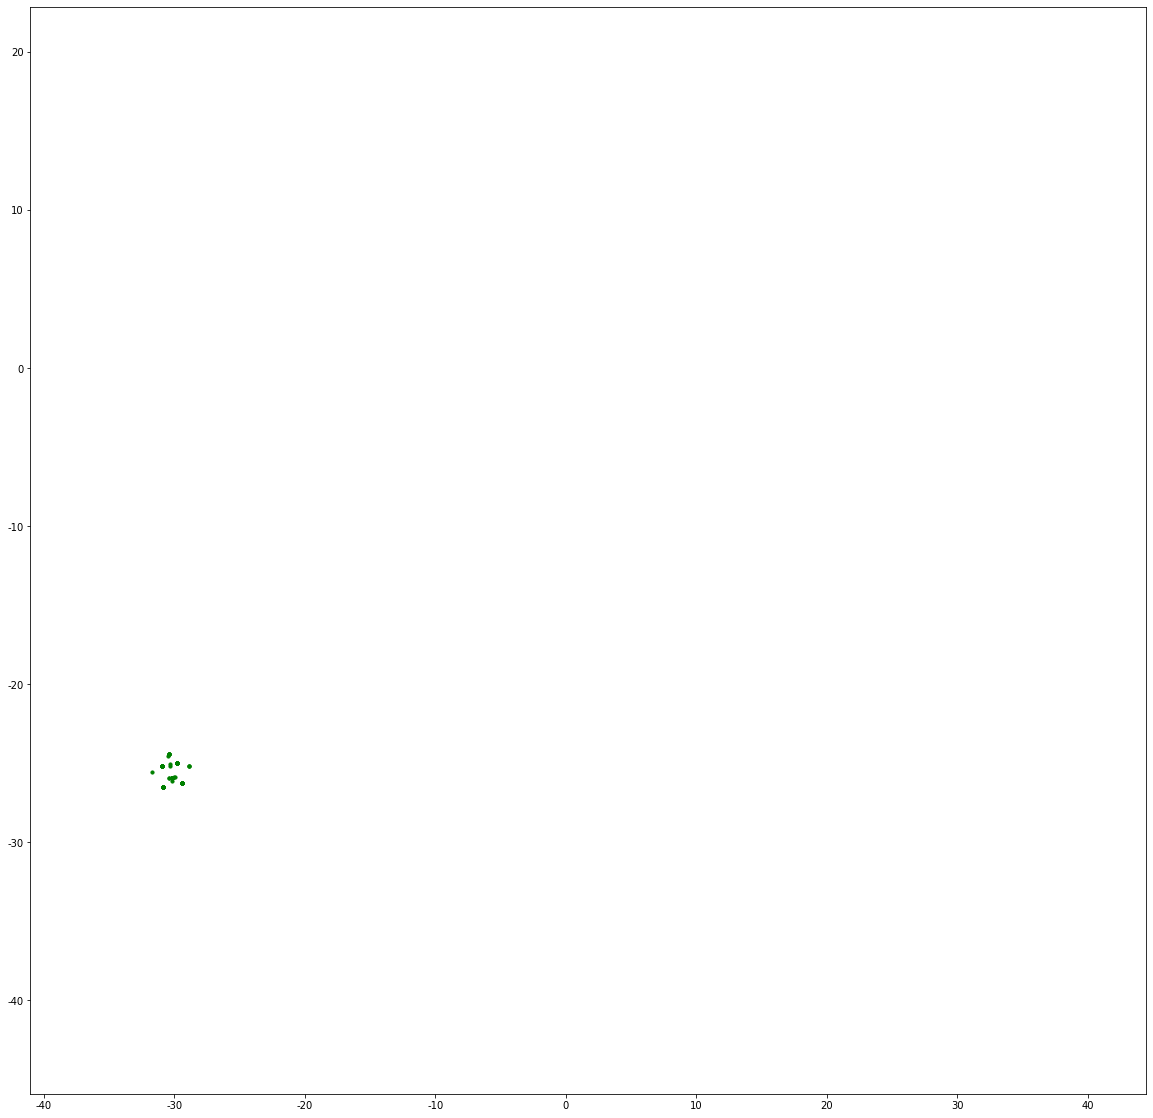

In [377]:
communities_1_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -35 and data_tsne[i,0] < -28:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_1.append(filenames[i])

# 1-2)

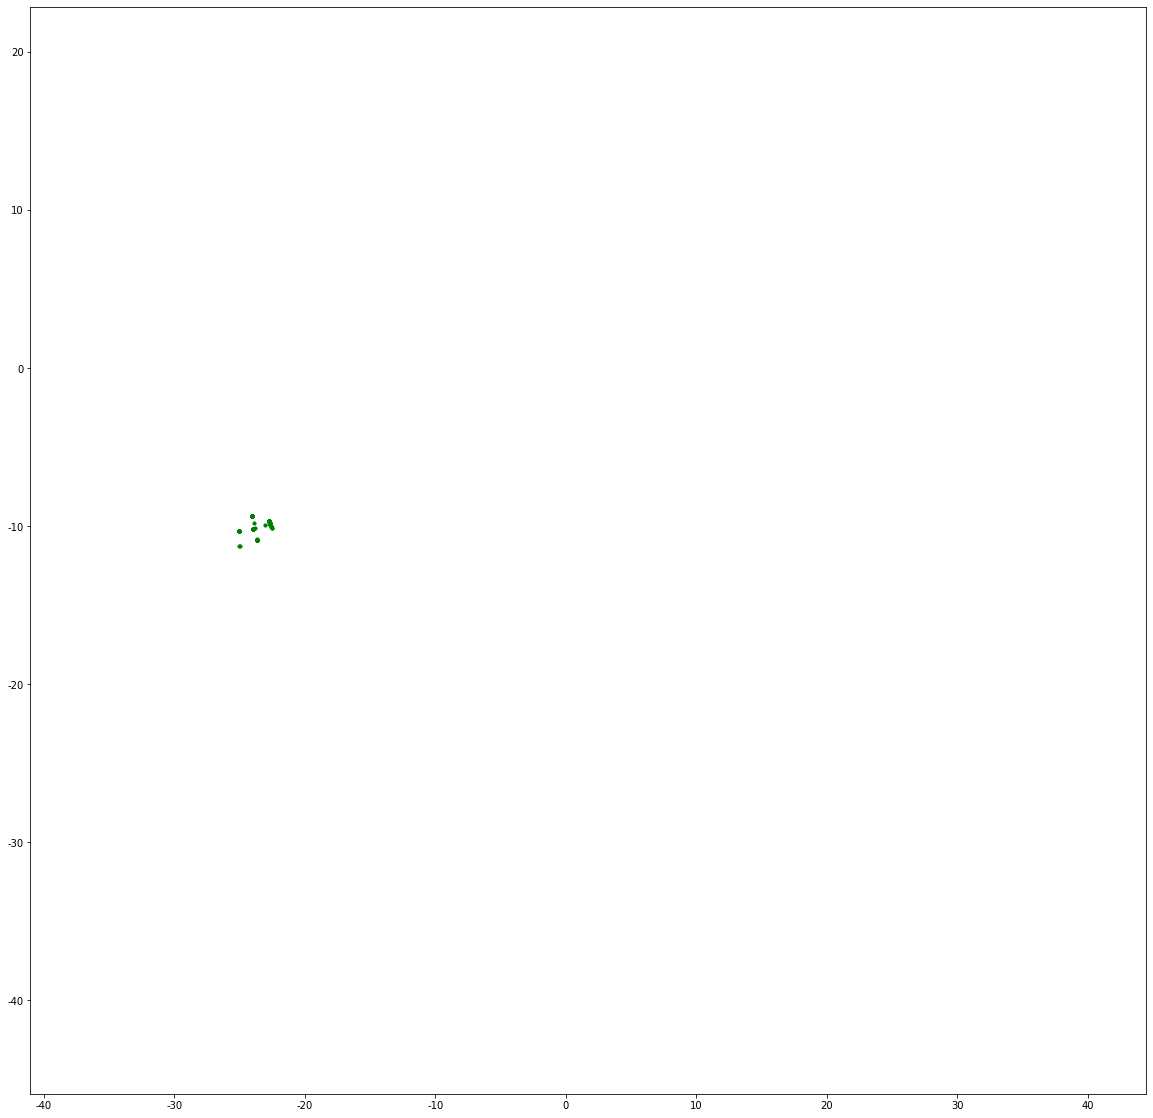

In [378]:
communities_1_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -28 and data_tsne[i,0] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_2.append(filenames[i])

# 1-3)

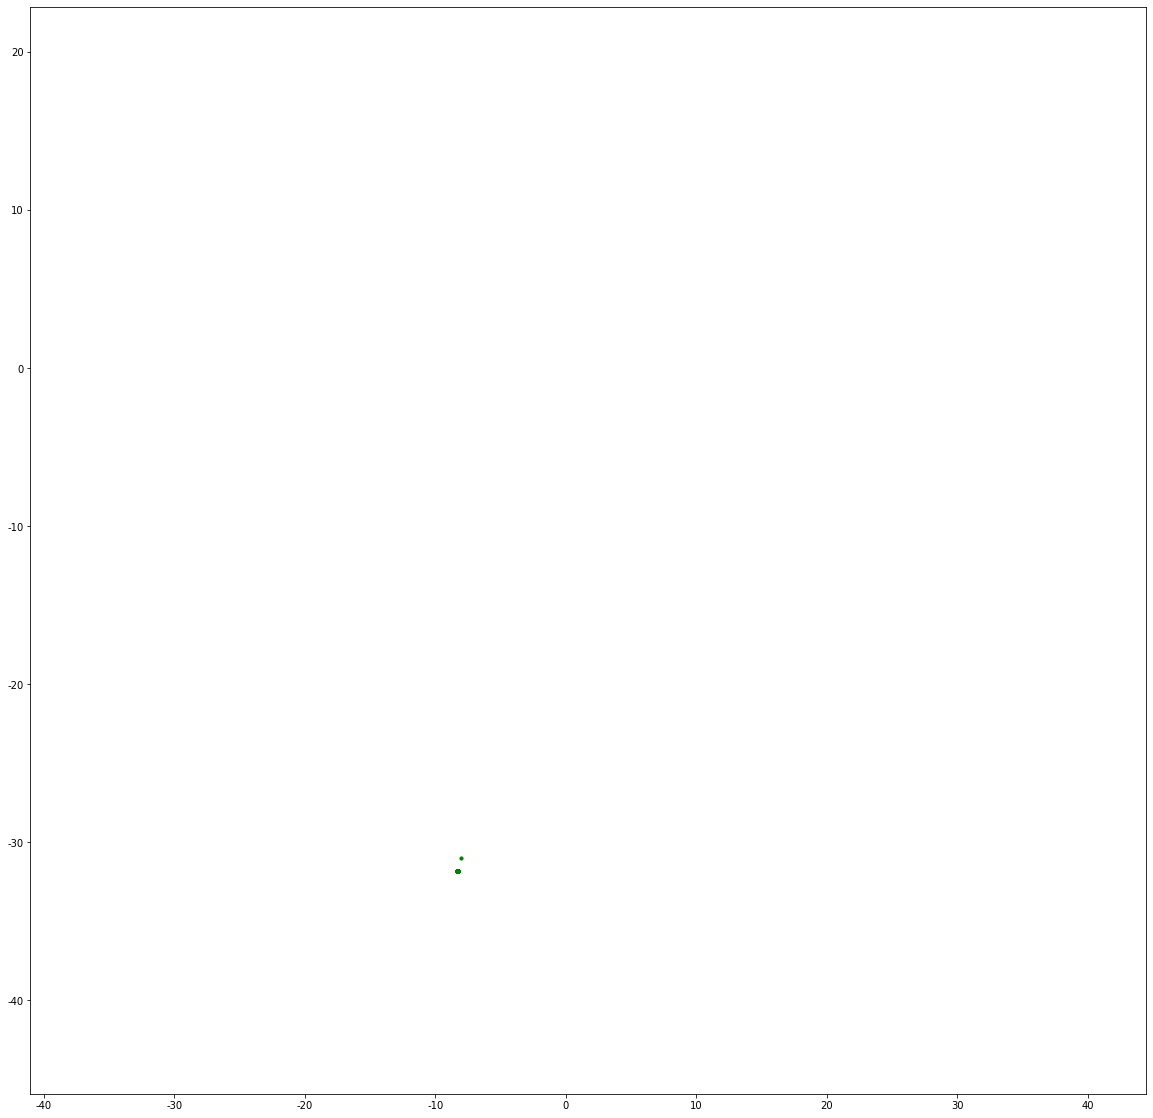

In [379]:
communities_1_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -12 and data_tsne[i,0] < -5 and data_tsne[i,1] < -30:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_3.append(filenames[i])

# 1-4)

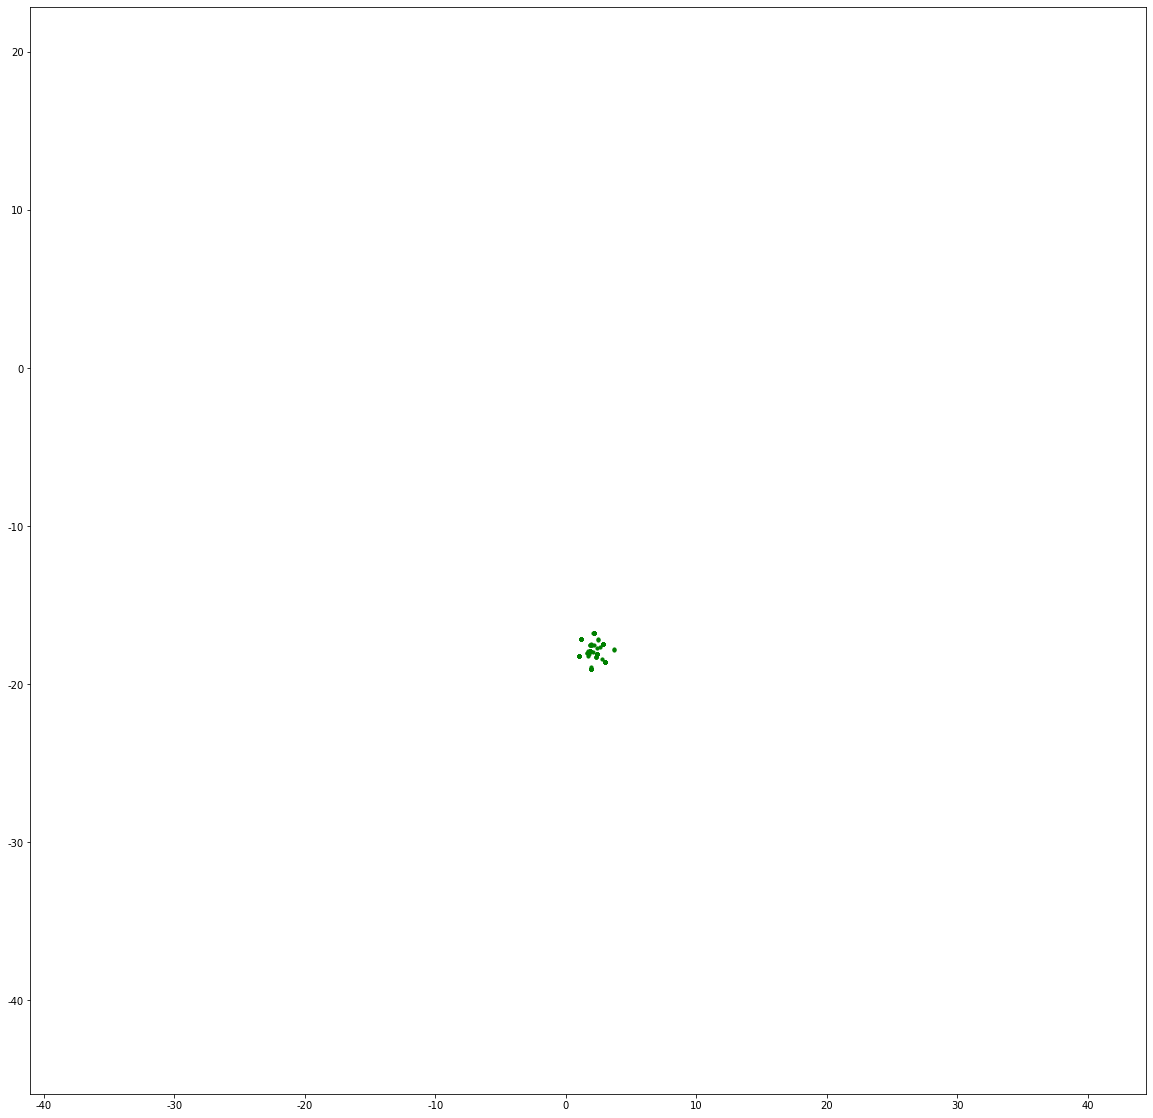

In [380]:
communities_1_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -10 and data_tsne[i,1] > -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_4.append(filenames[i])

# 1-5)

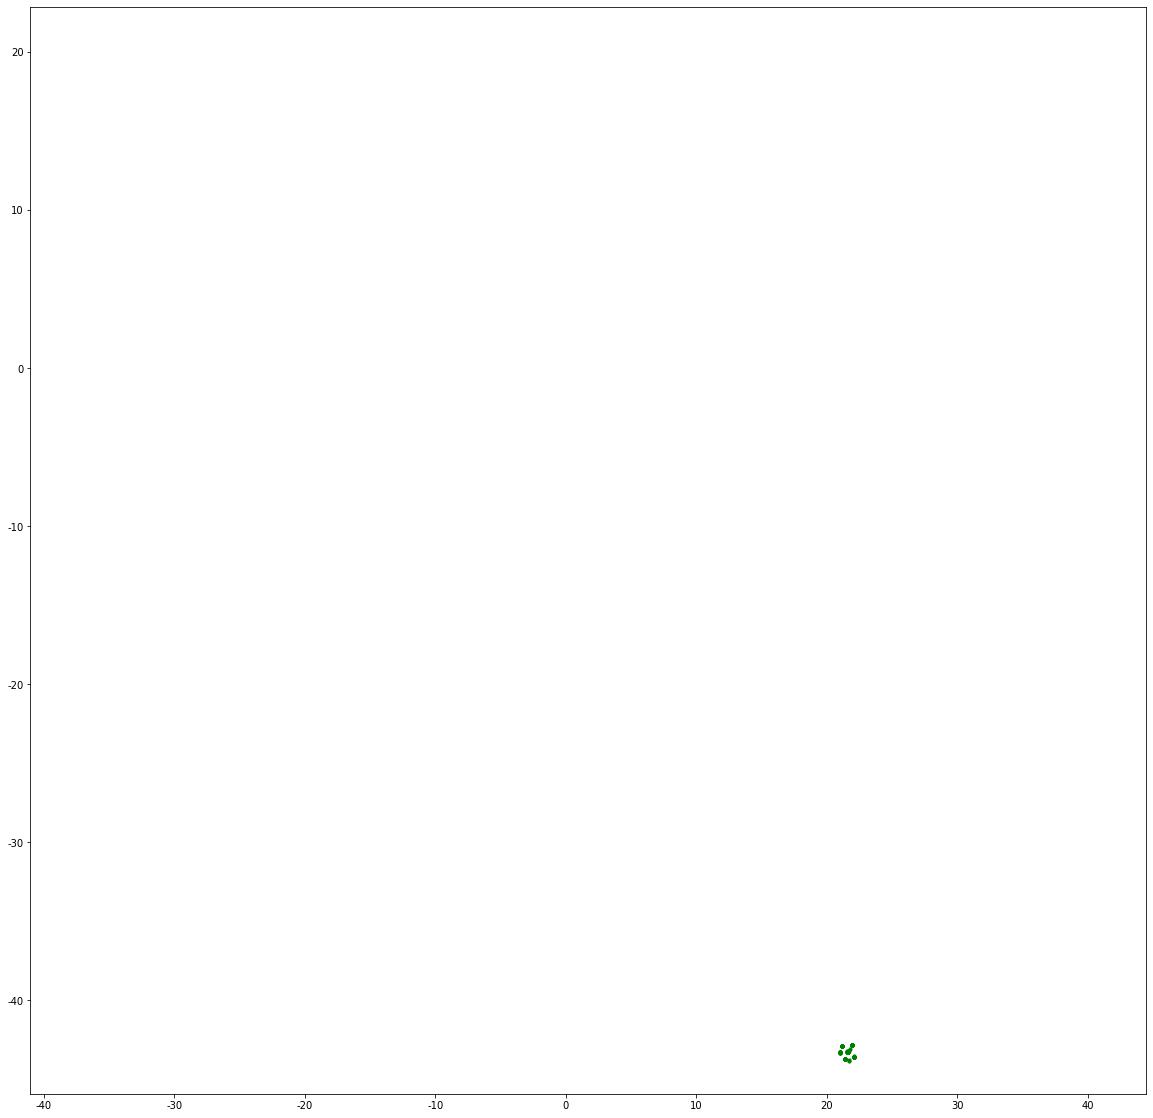

In [381]:
communities_1_5 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,1] < -40:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_5.append(filenames[i])

In [450]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_1_1, 1), word_count_and_tf_idf_similarity(communities_1_2, 1), 
                word_count_and_tf_idf_similarity(communities_1_3, 1), word_count_and_tf_idf_similarity(communities_1_4, 1),
                word_count_and_tf_idf_similarity(communities_1_5, 1)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('life', 0.1197), ('friend', 0.064), ('need', 0.0559), ('life', 0.1048), ('need', 0.0429))

2: (('friend', 0.0931), ('need', 0.0613), ('friend', 0.0382), ('need', 0.081), ('die', 0.0429))

3: (('year', 0.0691), ('life', 0.0613), ('life', 0.0324), ('year', 0.0595), ('help', 0.0368))

4: (('need', 0.0638), ('die', 0.0427), ('depressed', 0.0265), ('kill', 0.0595), ('done', 0.0368))

5: (('anxiety', 0.0638), ('kill', 0.04), ('alone', 0.0235), ('friend', 0.0571), ('kill', 0.0368))

6: (('thought', 0.0559), ('depression', 0.04), ('lonely', 0.0235), ('think', 0.0548), ('talk', 0.0184))

7: (('depression', 0.0532), ('time', 0.04), ('talk', 0.0235), ('die', 0.0524), ('goodbye', 0.0184))

8: (('kill', 0.0532), ('alone', 0.0373), ('hate', 0.0235), ('anxiety', 0.05), ('friend', 0.0184))

9: (('talk', 0.0505), ('suicide', 0.0347), ('die', 0.0206), ('day', 0.0476), ('exist', 0.0123))

10: (('day', 0.0479), ('talk', 0.032), ('today', 0.0206), ('depression', 0.0476), ('option', 0.0123))

11: (('th